In [589]:
print("GROUP 1: K-MEANS CLUSTERING")

GROUP 1: K-MEANS CLUSTERING


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
from scipy.stats import mode

pd.options.mode.copy_on_write = True

In [591]:
df = pd.read_csv('fish_data.csv')
df.head()

species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    1419 non-null   object 
 1   length     1419 non-null   float64
 2   weight     1419 non-null   float64
 3   w_l_ratio  1419 non-null   float64
dtypes: float64(3), object(1)
memory usage: 44.5+ KB


In [ ]:
df = df.dropna()
df.info()

#establishing which 2 features to use
feature1 = "length"
feature2 = "weight"

# in case 3 features will be tested
# feature3 = "w_l_ratio"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    1419 non-null   object 
 1   length     1419 non-null   float64
 2   weight     1419 non-null   float64
 3   w_l_ratio  1419 non-null   float64
dtypes: float64(3), object(1)
memory usage: 44.5+ KB


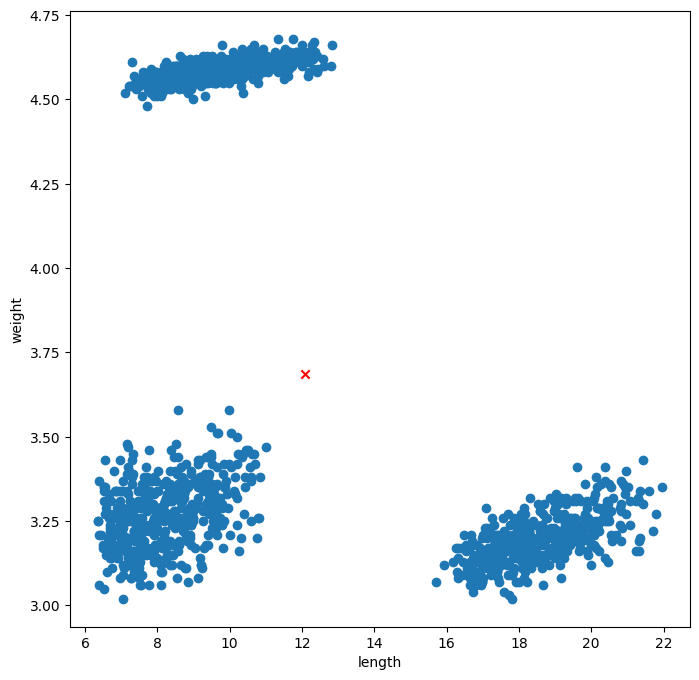

In [607]:
adjusted_df = df[[feature1, feature2]]
test_label = df['species'].values
adjusted_df.head()

#plotting what the current dataset looks like
centroid = [adjusted_df[feature1].mean(), adjusted_df[feature2].mean()]

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(adjusted_df[feature1], adjusted_df[feature2])
ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [595]:
# distance formula
def calculate_euclidean_distance(p1, p2):
    return sum((p1[i] - p2[i]) ** 2 for i in range(len(p1))) ** 0.5

In [596]:
# assigns each data point to its respective cluster based on its distance to a centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [calculate_euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters


In [597]:
def compute_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:  # Avoid division by zero
            new_centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(random.choice(cluster))  # Assign random point if cluster is empty
    return new_centroids

In [598]:
def compute_wcss(clusters, centroids):
    wcss = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            wcss += calculate_euclidean_distance(point, centroids[i]) ** 2
    return wcss

In [ ]:
def plot_clusters(data, centroids, clusters, iteration, k):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plt.figure(figsize=(7, 7))
    for i, cluster in enumerate(clusters):
        cluster_points = list(zip(*cluster))
        if cluster_points:
            plt.scatter(cluster_points[0], cluster_points[1], c=colors[i % len(colors)], label=f'Cluster {i+1}')
    centroid_points = list(zip(*centroids))
    plt.scatter(centroid_points[0], centroid_points[1], c='k', marker='x', s=100, label='Centroids')
    plt.title(f'Iteration {iteration}, {k} Cluster/s')
    plt.legend()
    plt.show()

In [ ]:
# K-Means Algorithm with visualization
def k_means(data, k, max_iters=1000):
    centroids = random.sample(data, k)  # Randomly initialize centroids
    for i in range(max_iters):
        clusters = assign_clusters(data, centroids) # determines clusters

        plot_clusters(data, centroids, clusters, i+1,k)  # Plot each iteration

        wcss = compute_wcss(clusters, centroids)
        print(f"Iteration {i+1}, {k} Cluster/s. WCSS: {wcss}")

        new_centroids = compute_centroids(clusters) # assigns new centroids
        if new_centroids == centroids:
            wcss_values[k] = wcss
            break  # Stops if centroids do not change
        centroids = new_centroids
    return centroids, clusters

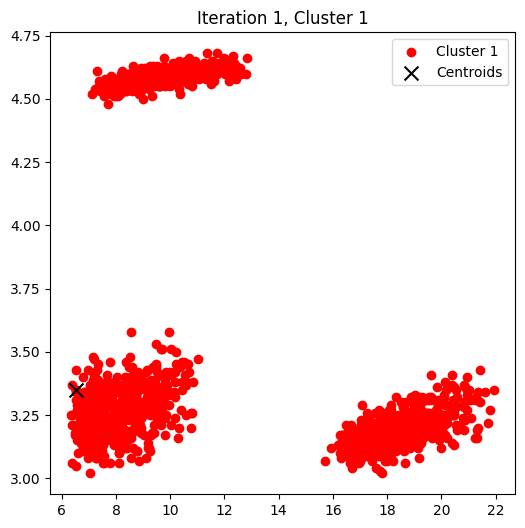

Iteration 1 WCSS: 76416.1664


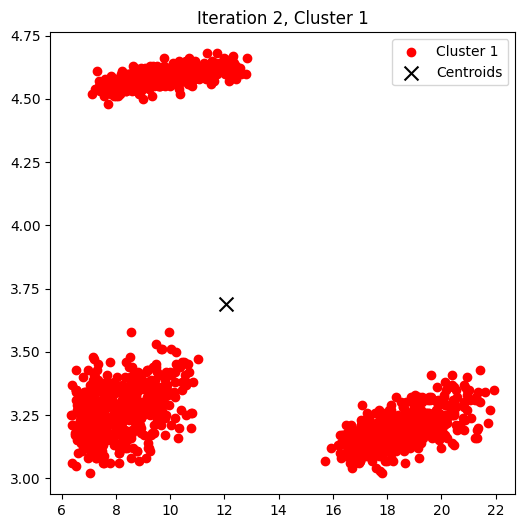

Iteration 2 WCSS: 32439.853627061315


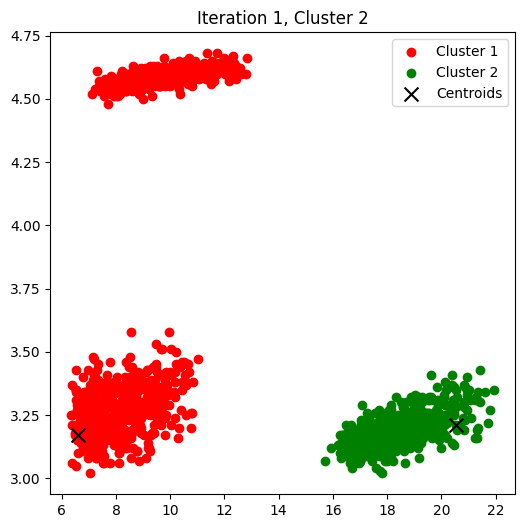

Iteration 1 WCSS: 10423.34939999999


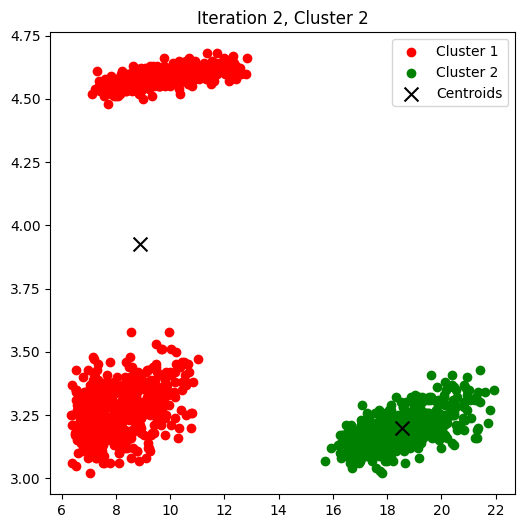

Iteration 2 WCSS: 3012.7193837188934


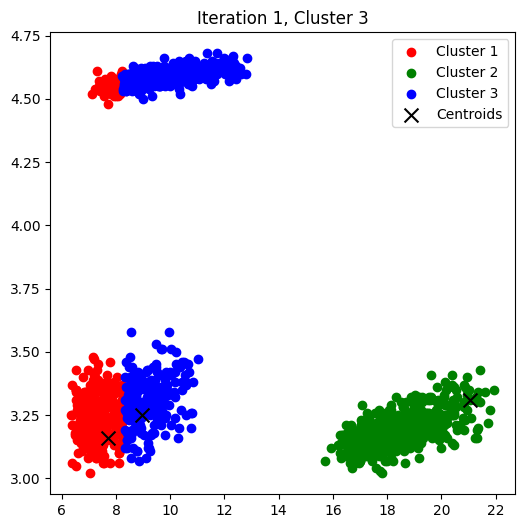

Iteration 1 WCSS: 5672.759099999995


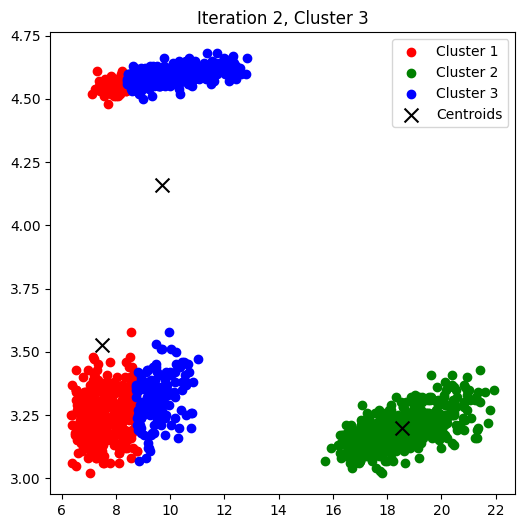

Iteration 2 WCSS: 1769.9627645247283


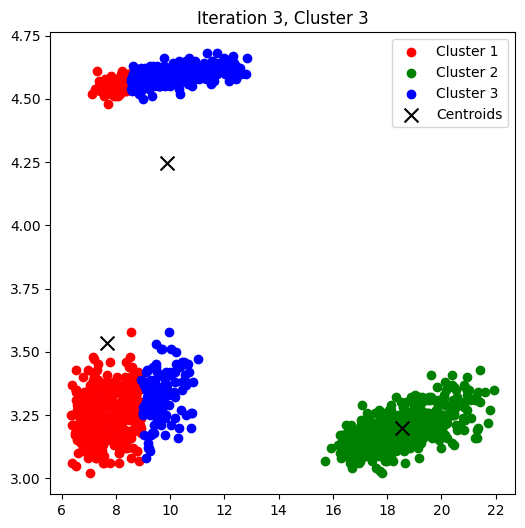

Iteration 3 WCSS: 1712.059334826736


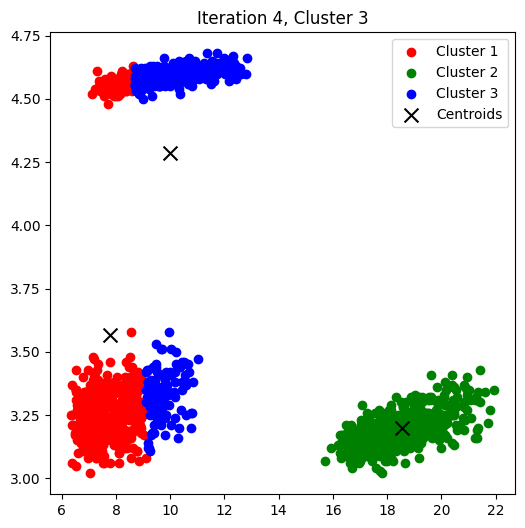

Iteration 4 WCSS: 1689.8224061646085


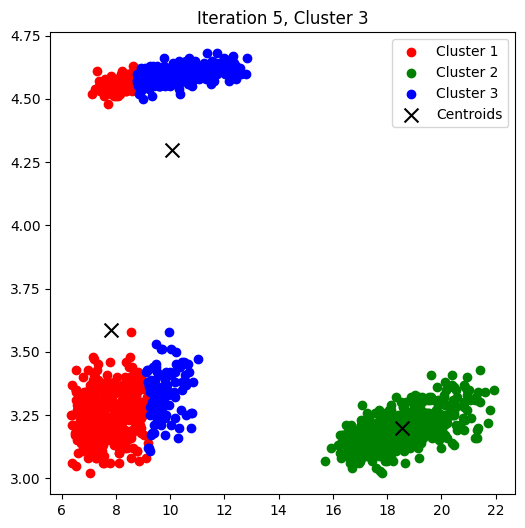

Iteration 5 WCSS: 1685.6442452931929


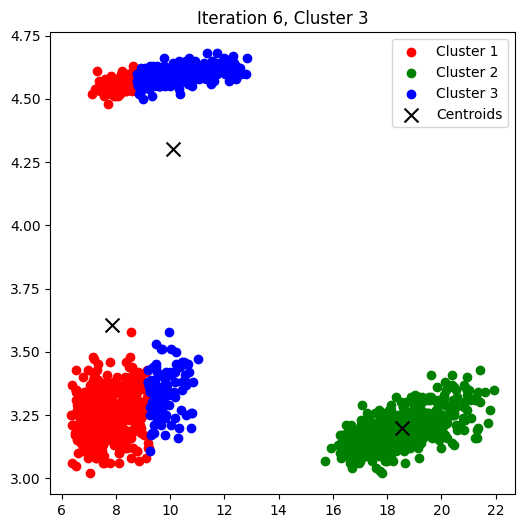

Iteration 6 WCSS: 1683.8334297401552


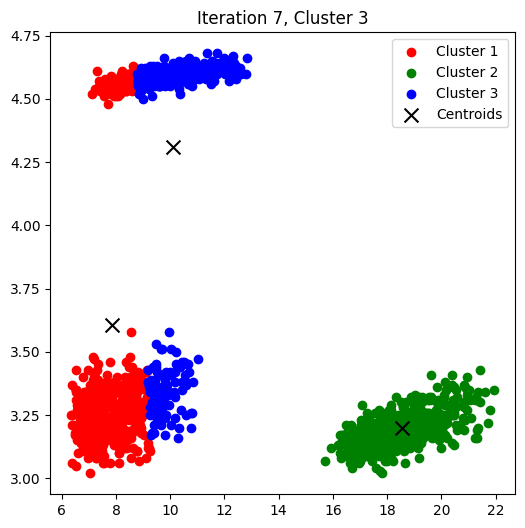

Iteration 7 WCSS: 1683.5794127898494


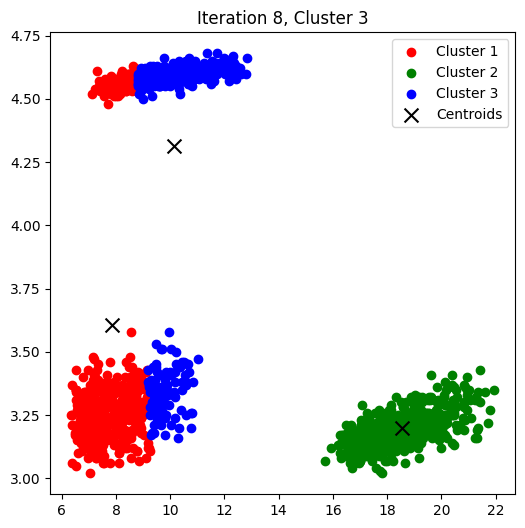

Iteration 8 WCSS: 1683.509960242074


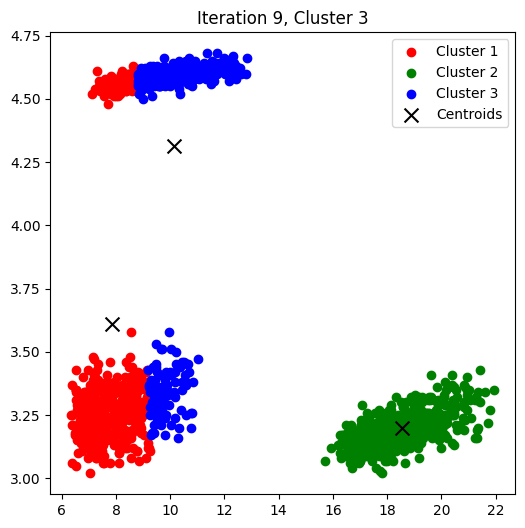

Iteration 9 WCSS: 1683.3128715875368


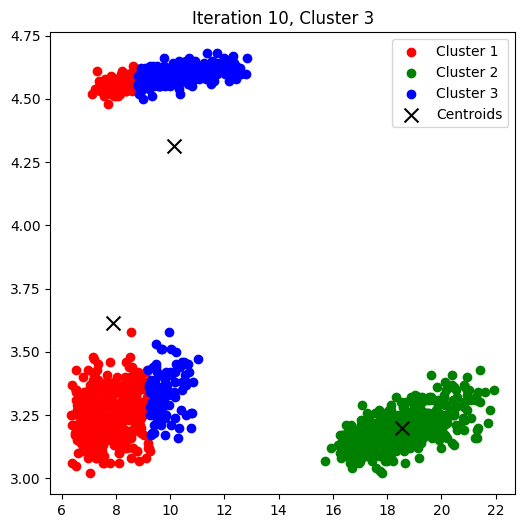

Iteration 10 WCSS: 1683.226287092987


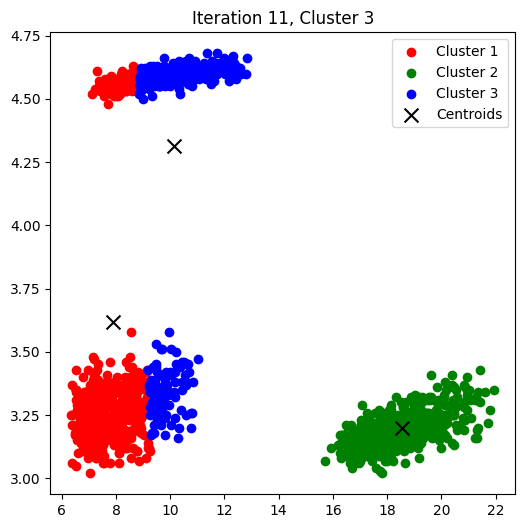

Iteration 11 WCSS: 1683.138072464964


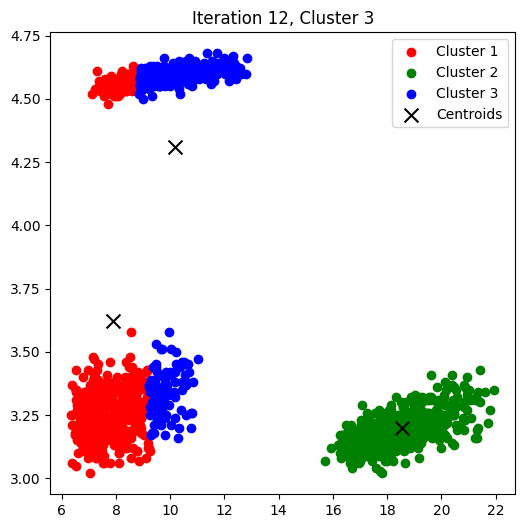

Iteration 12 WCSS: 1683.0512535990438


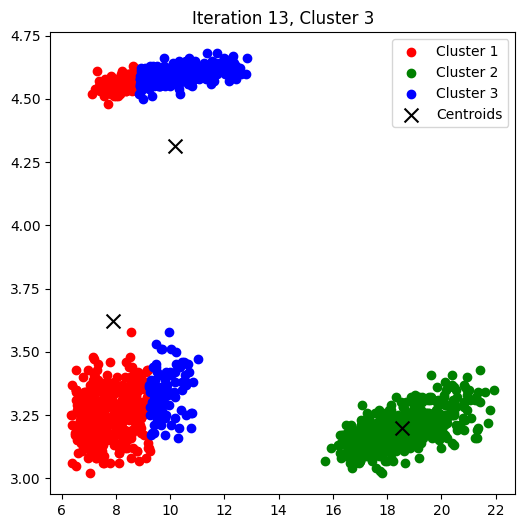

Iteration 13 WCSS: 1683.0438713666877


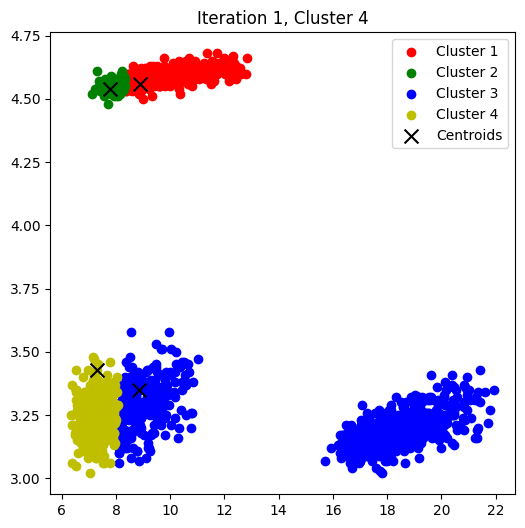

Iteration 1 WCSS: 45853.24060000003


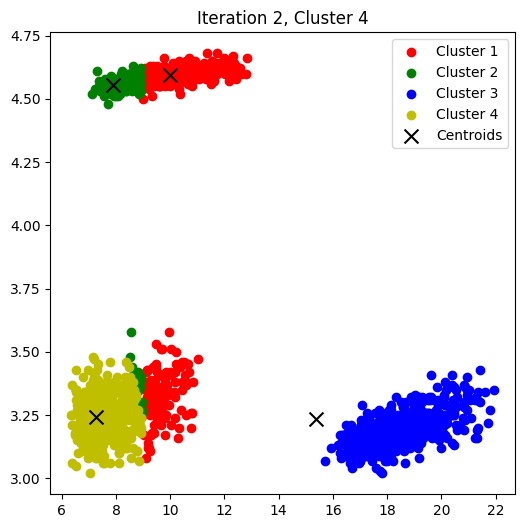

Iteration 2 WCSS: 6301.982840552688


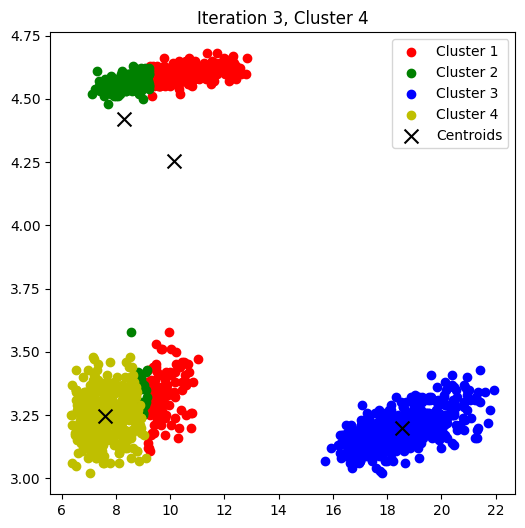

Iteration 3 WCSS: 1442.232130092984


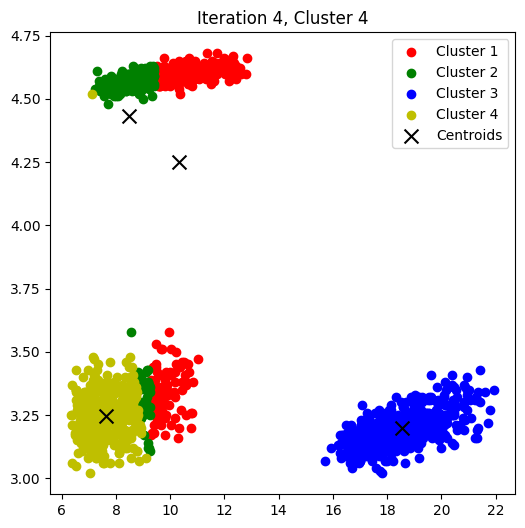

Iteration 4 WCSS: 1412.930355056603


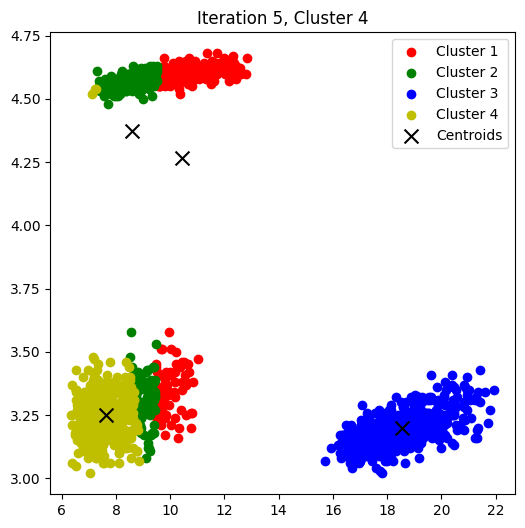

Iteration 5 WCSS: 1392.4347022360685


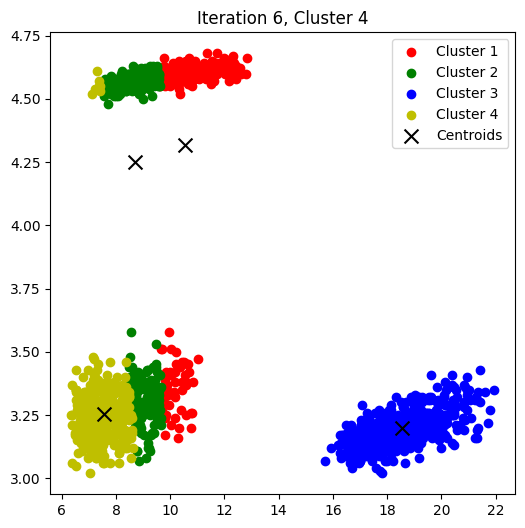

Iteration 6 WCSS: 1365.3242482935368


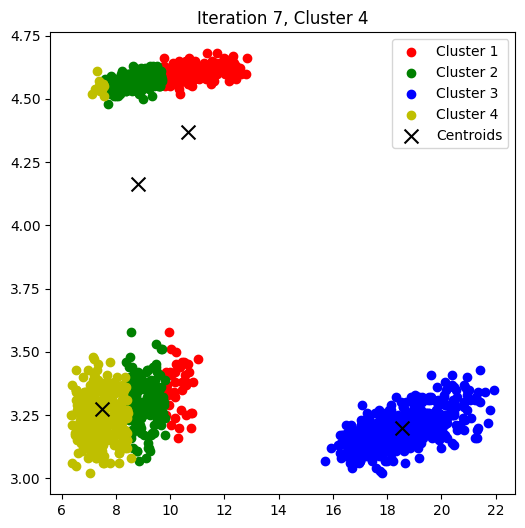

Iteration 7 WCSS: 1347.3423817072294


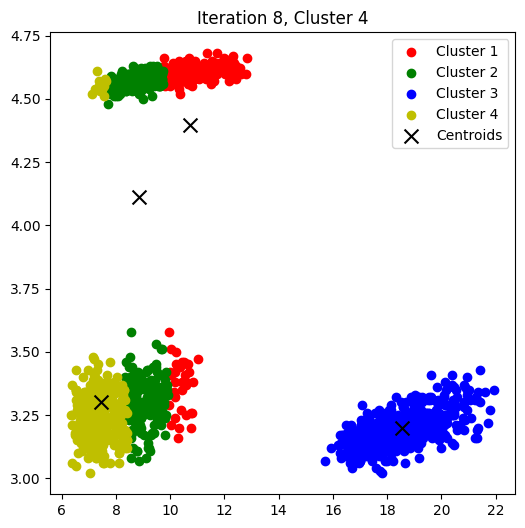

Iteration 8 WCSS: 1339.353689375581


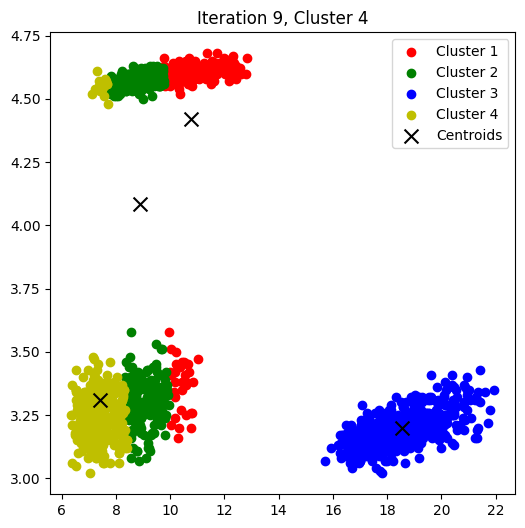

Iteration 9 WCSS: 1337.386843495233


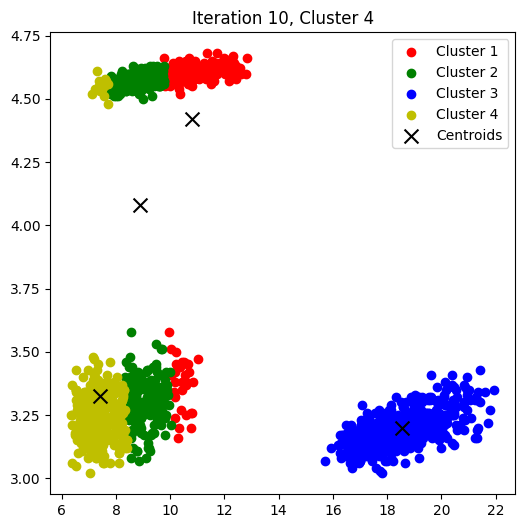

Iteration 10 WCSS: 1336.8374595065115


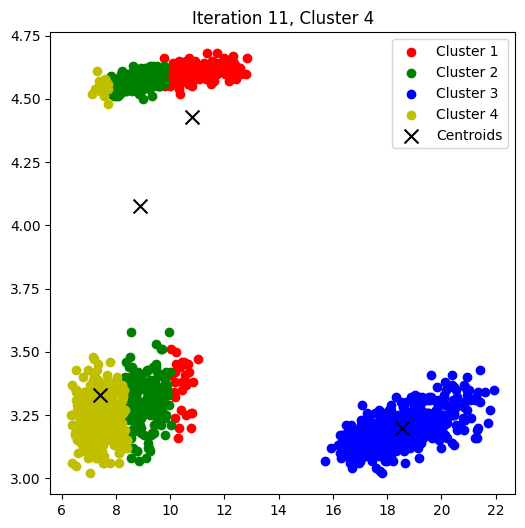

Iteration 11 WCSS: 1336.569567446635


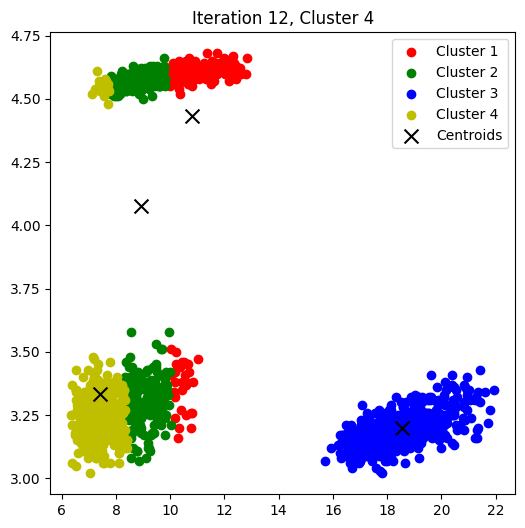

Iteration 12 WCSS: 1336.458604624265


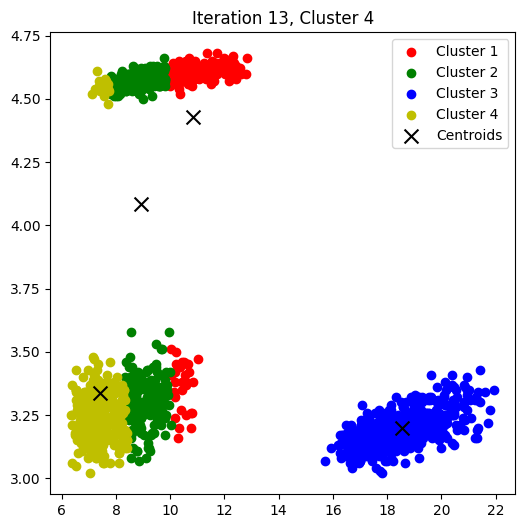

Iteration 13 WCSS: 1336.2045059834454


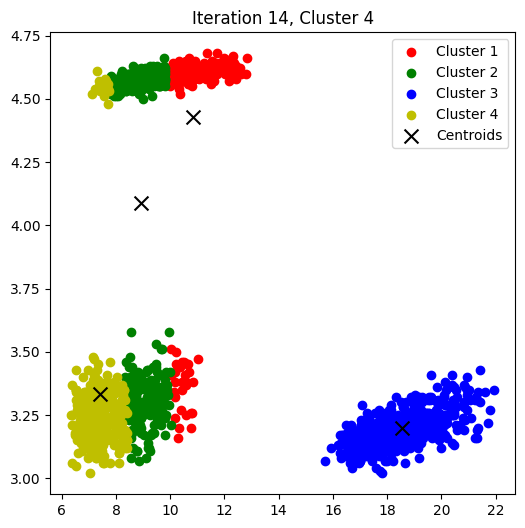

Iteration 14 WCSS: 1336.1038377466723


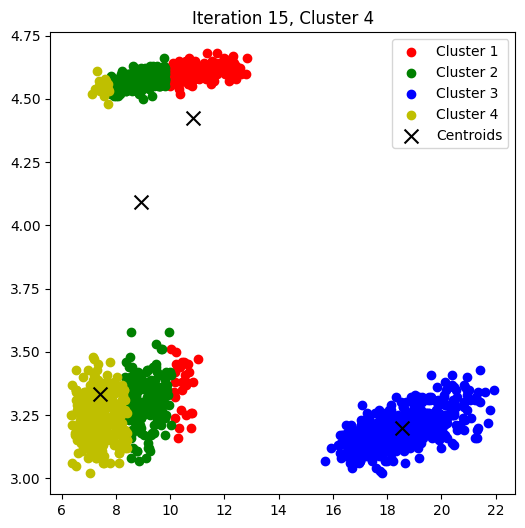

Iteration 15 WCSS: 1336.052351181792


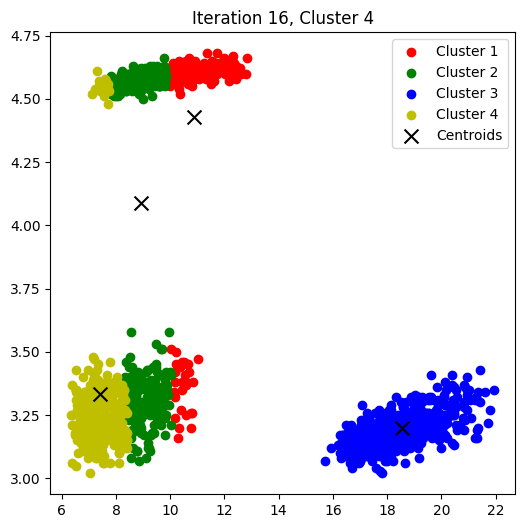

Iteration 16 WCSS: 1336.0385555436837


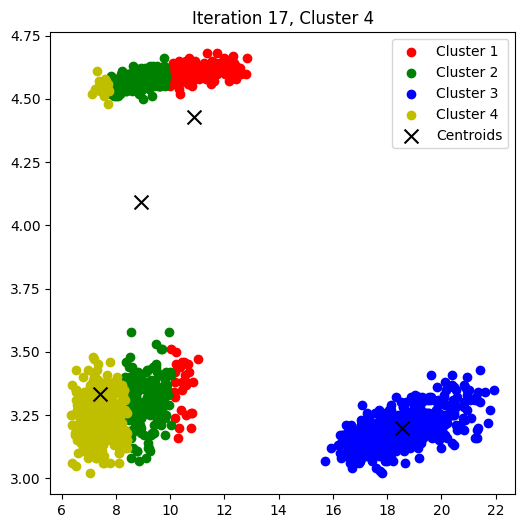

Iteration 17 WCSS: 1336.0311173080688


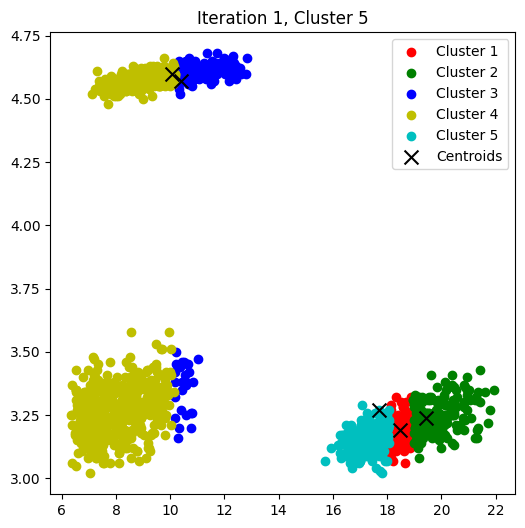

Iteration 1 WCSS: 4122.543499999999


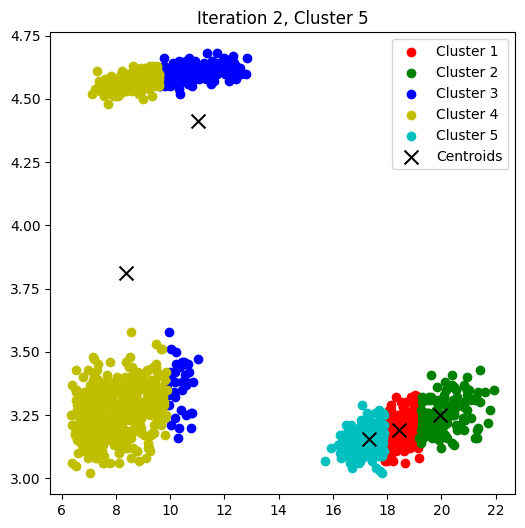

Iteration 2 WCSS: 1205.7626190140193


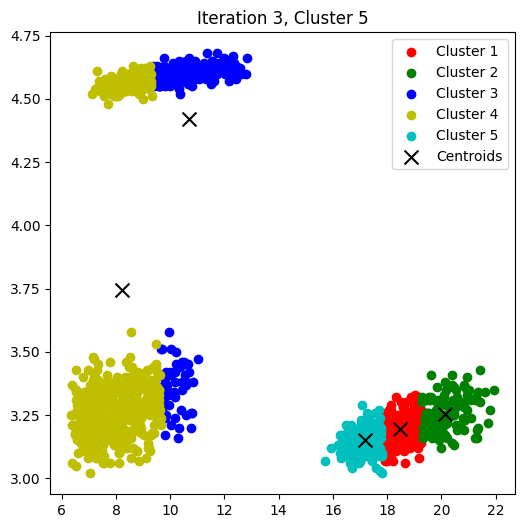

Iteration 3 WCSS: 1106.1989257886398


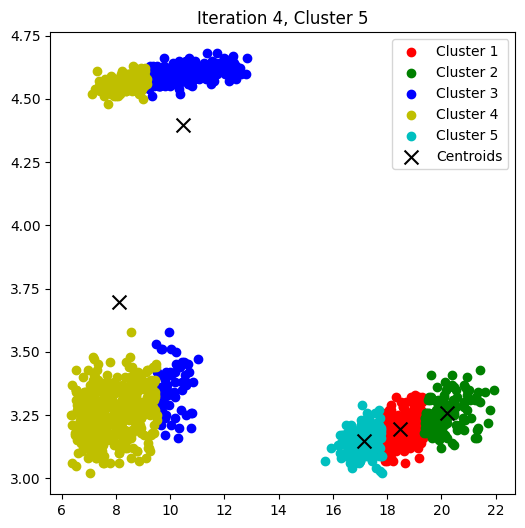

Iteration 4 WCSS: 1068.3314596534801


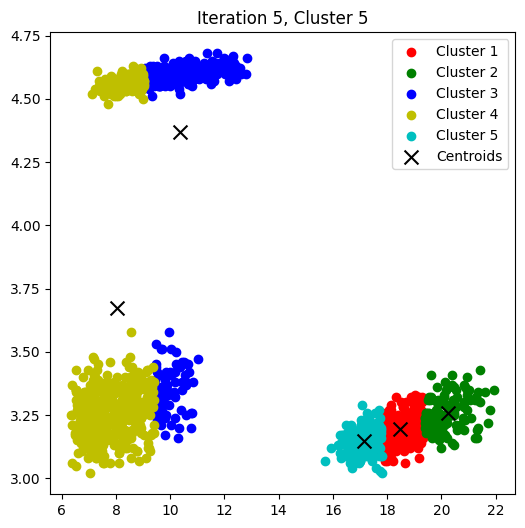

Iteration 5 WCSS: 1053.971478317917


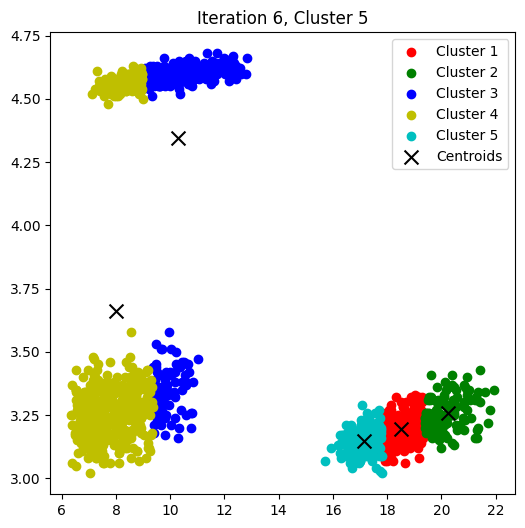

Iteration 6 WCSS: 1048.0432383306372


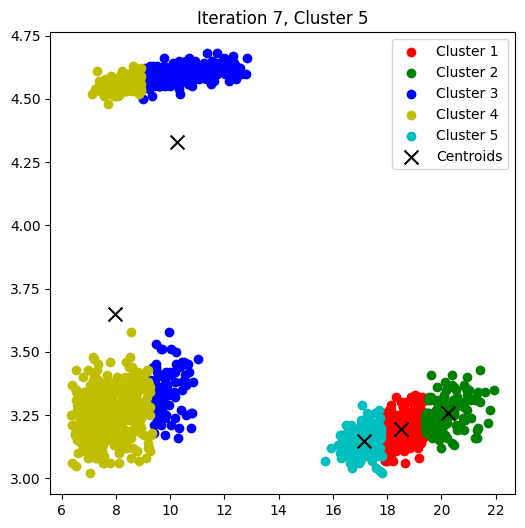

Iteration 7 WCSS: 1044.7545137499274


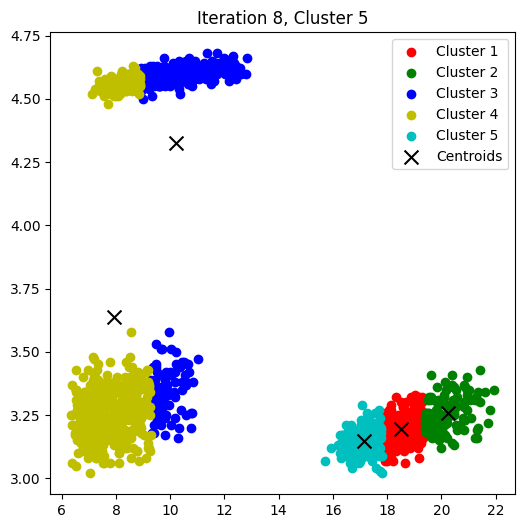

Iteration 8 WCSS: 1043.140959938152


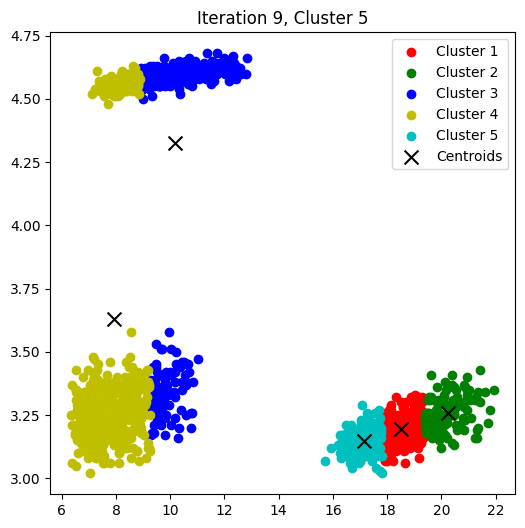

Iteration 9 WCSS: 1042.42192355471


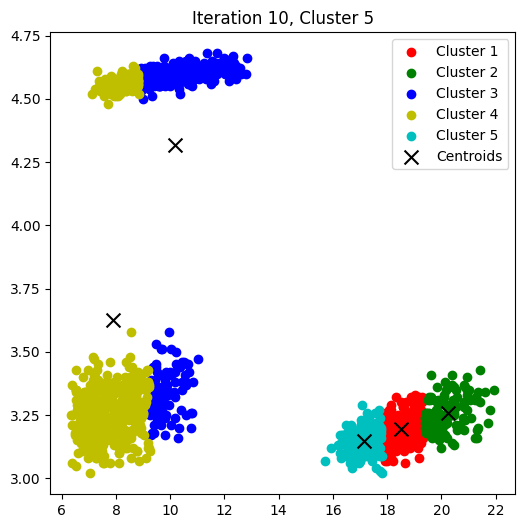

Iteration 10 WCSS: 1042.0196433862584


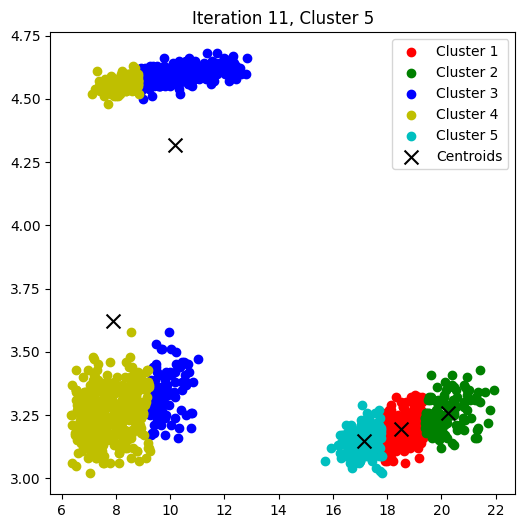

Iteration 11 WCSS: 1041.995352719269


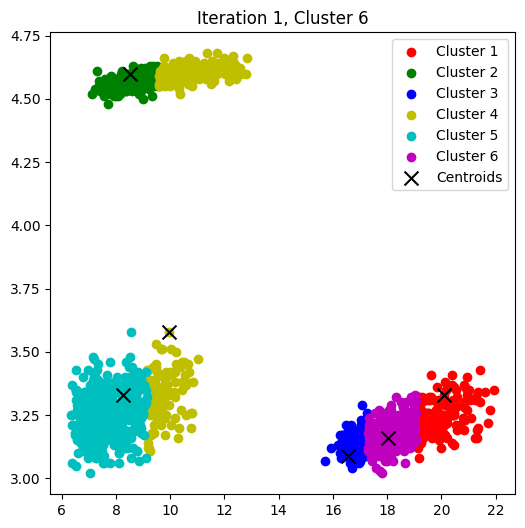

Iteration 1 WCSS: 1112.975500000001


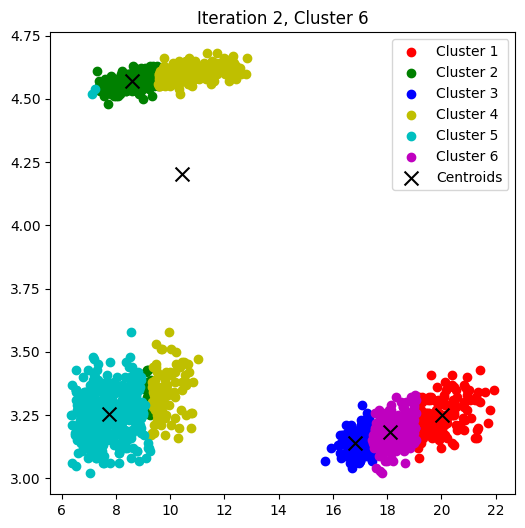

Iteration 2 WCSS: 781.1602033335184


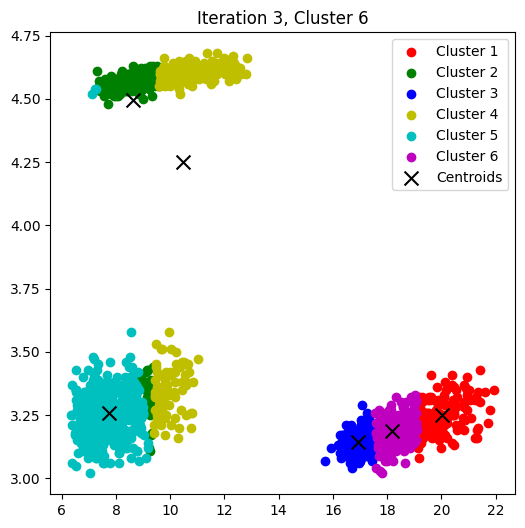

Iteration 3 WCSS: 768.6722554310661


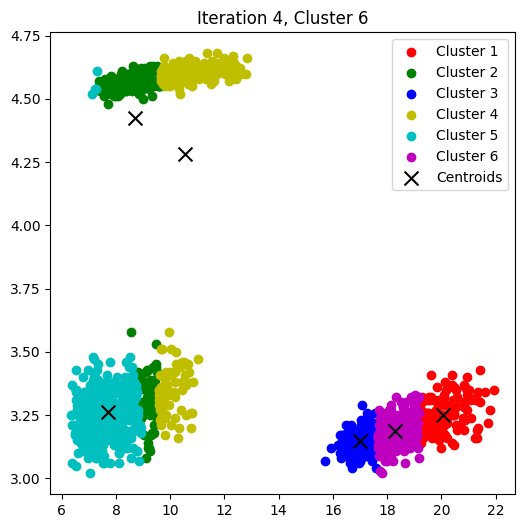

Iteration 4 WCSS: 751.8169132498718


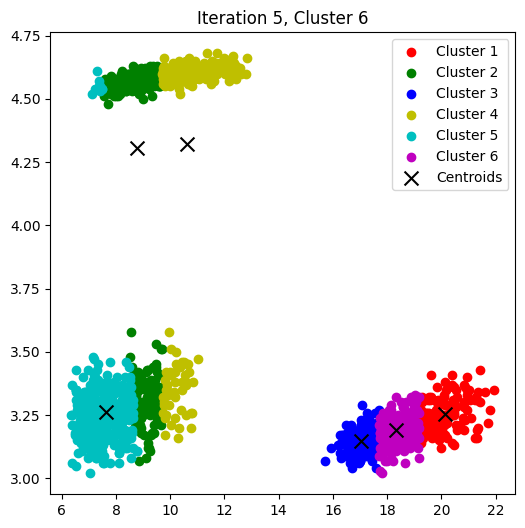

Iteration 5 WCSS: 726.7701611277648


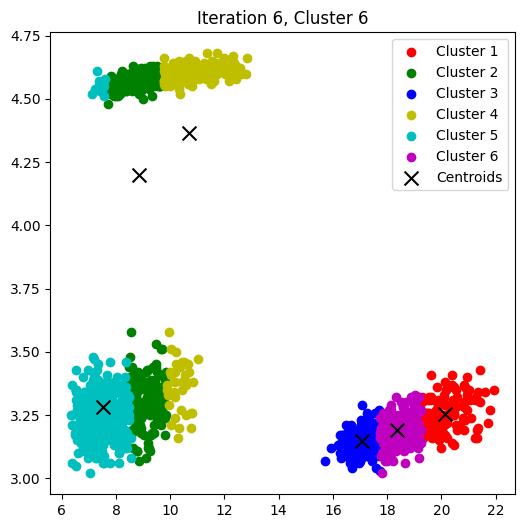

Iteration 6 WCSS: 707.5146624855493


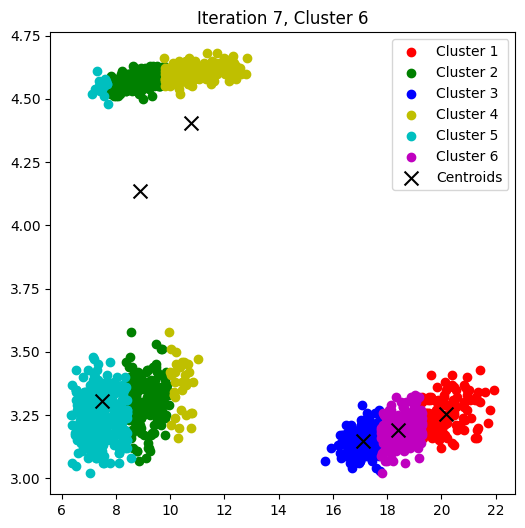

Iteration 7 WCSS: 698.9982195521343


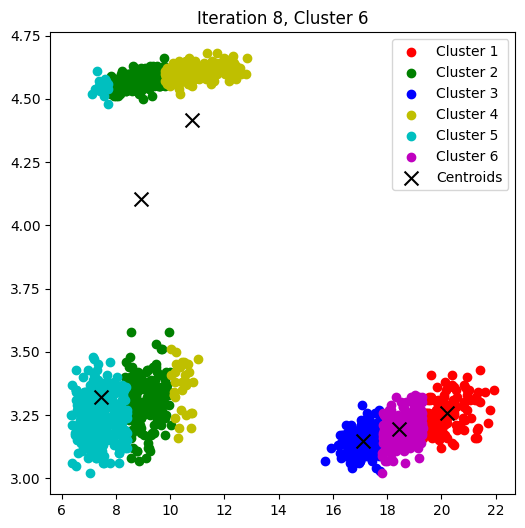

Iteration 8 WCSS: 696.4381032213829


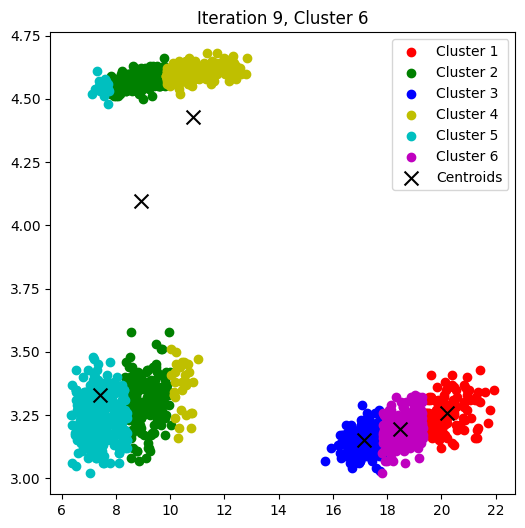

Iteration 9 WCSS: 695.2065663401958


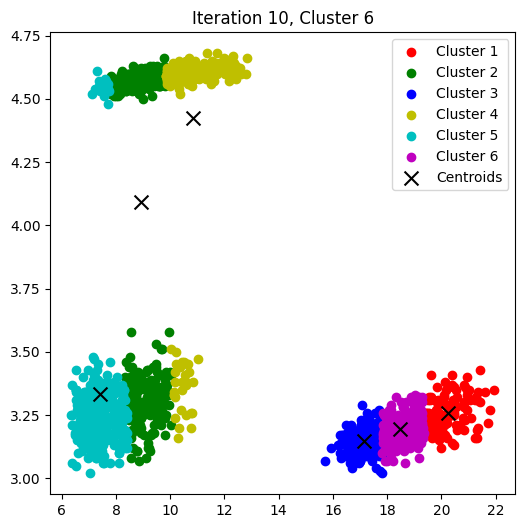

Iteration 10 WCSS: 695.0388809153809


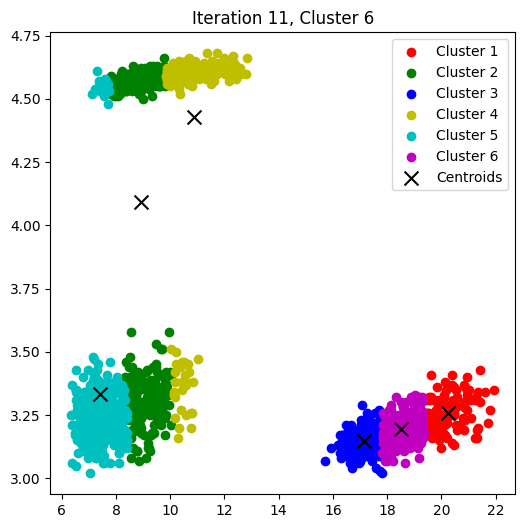

Iteration 11 WCSS: 694.9994120306451


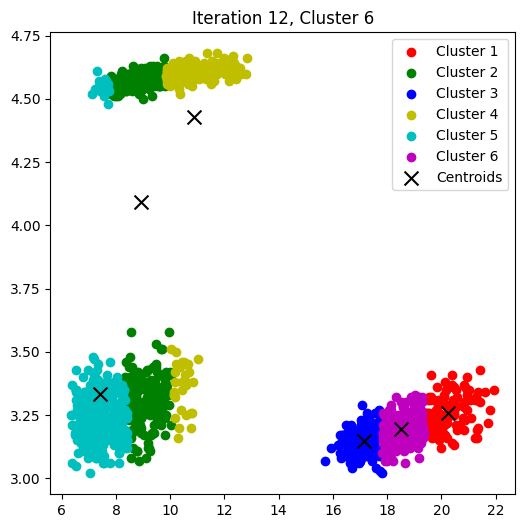

Iteration 12 WCSS: 694.9919777243441


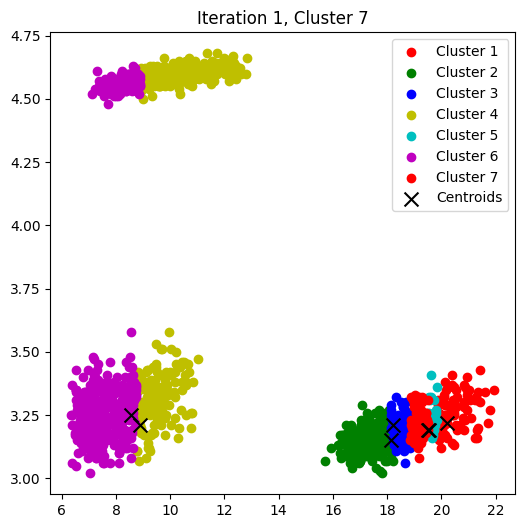

Iteration 1 WCSS: 2653.827800000004


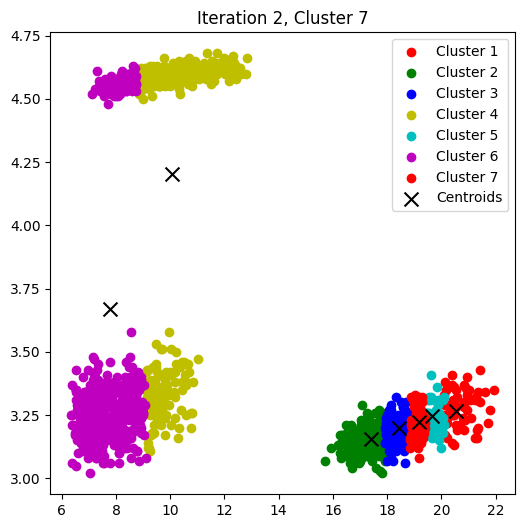

Iteration 2 WCSS: 1008.0538527107437


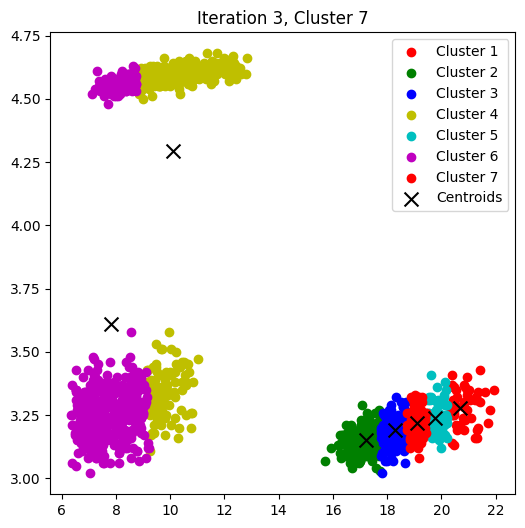

Iteration 3 WCSS: 982.613294196459


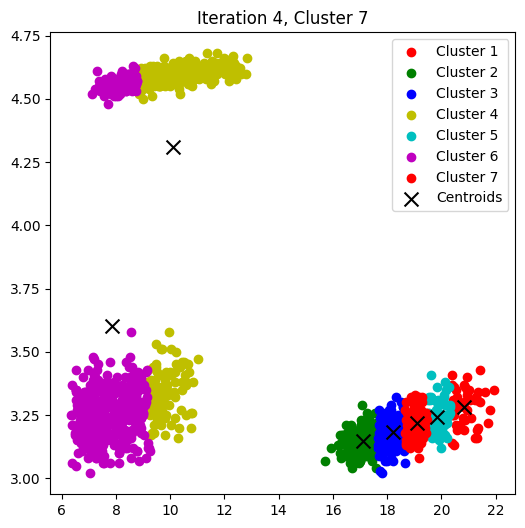

Iteration 4 WCSS: 975.4733879614827


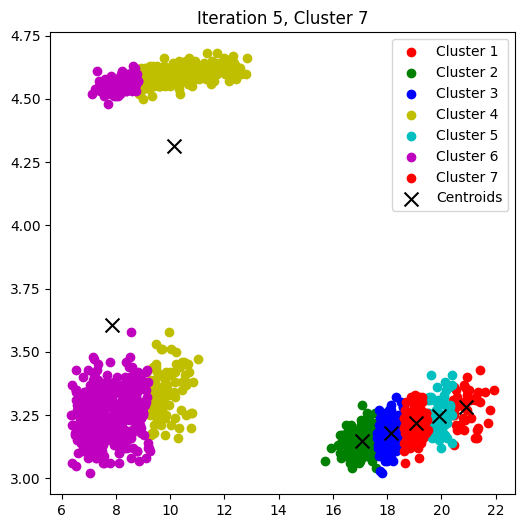

Iteration 5 WCSS: 972.8564383821804


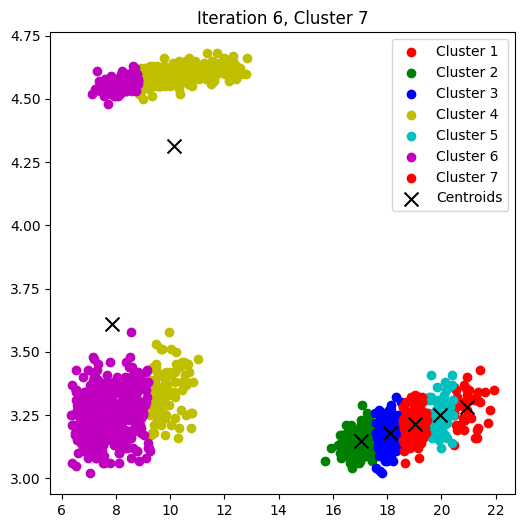

Iteration 6 WCSS: 971.5164786247715


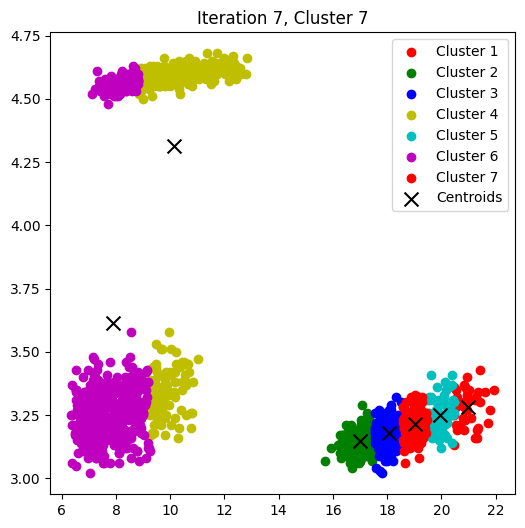

Iteration 7 WCSS: 970.8483947797687


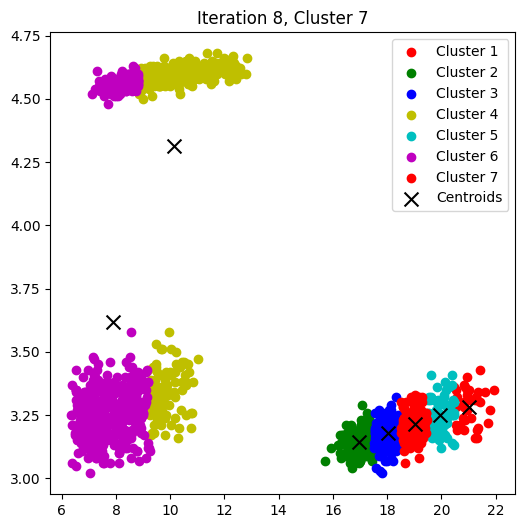

Iteration 8 WCSS: 970.4113549384541


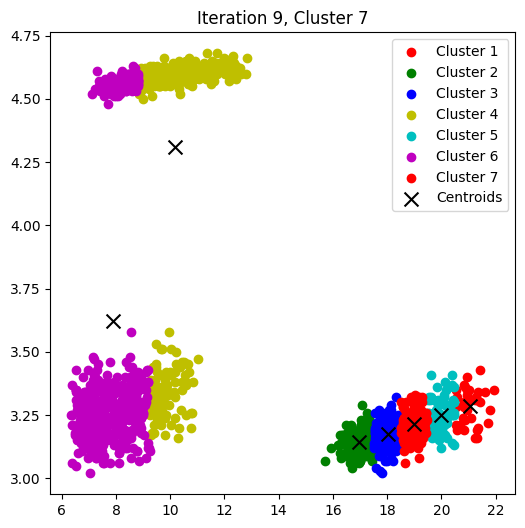

Iteration 9 WCSS: 970.0541631518162


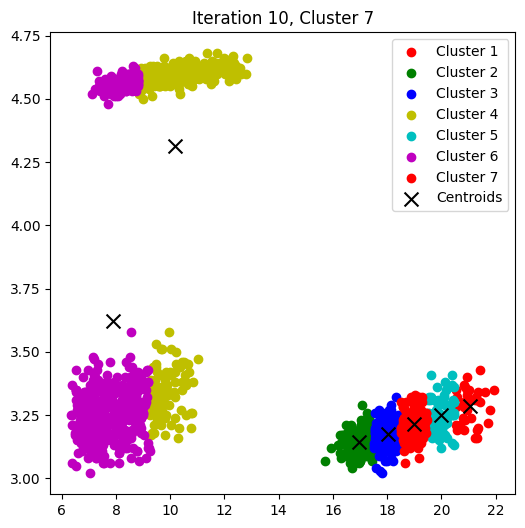

Iteration 10 WCSS: 970.0110048421392


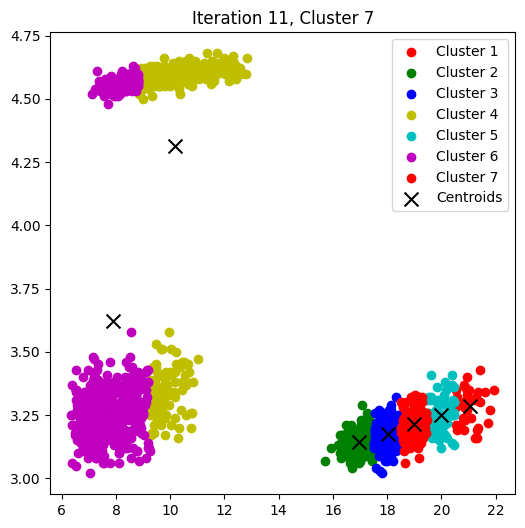

Iteration 11 WCSS: 970.0070132853164


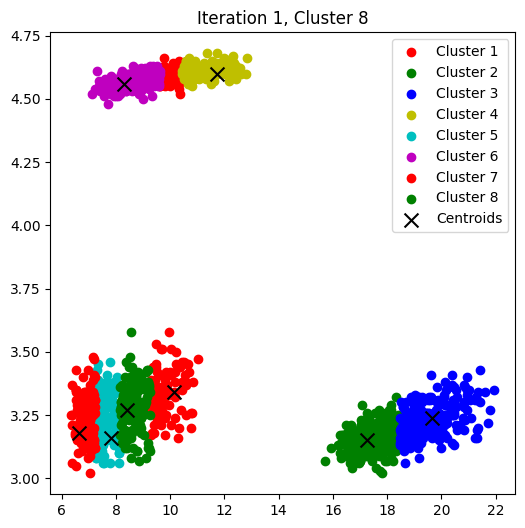

Iteration 1 WCSS: 697.5442999999987


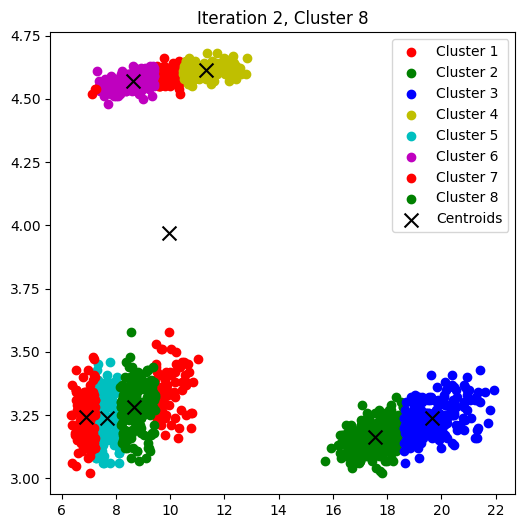

Iteration 2 WCSS: 502.90873986965215


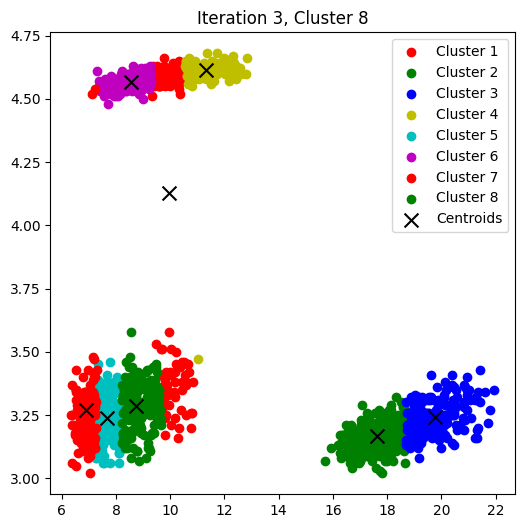

Iteration 3 WCSS: 482.30832355917374


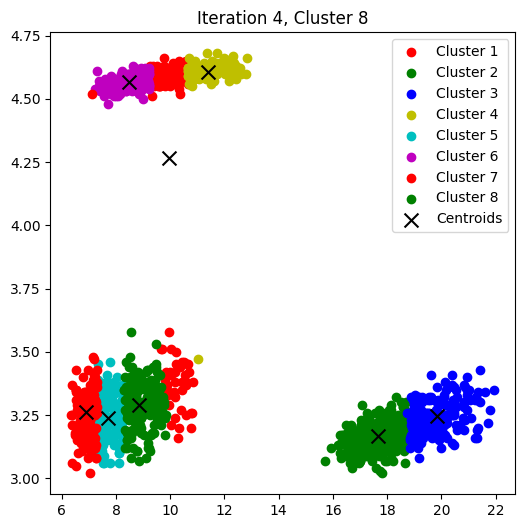

Iteration 4 WCSS: 467.02998474833413


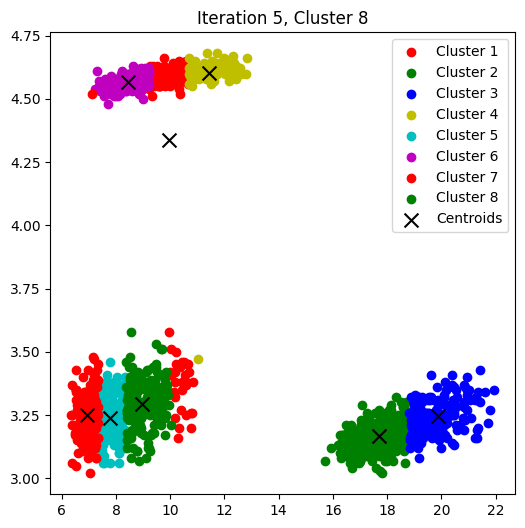

Iteration 5 WCSS: 459.8542777364473


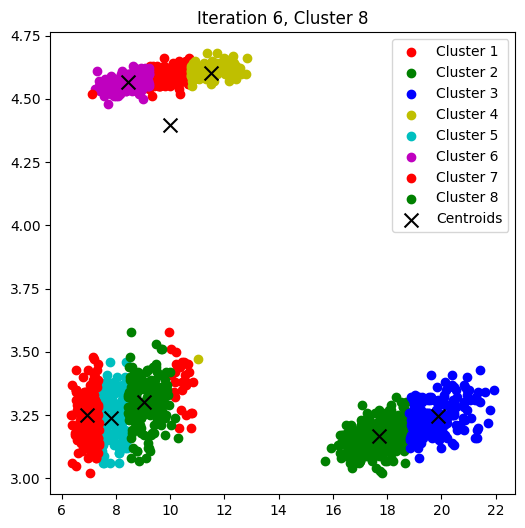

Iteration 6 WCSS: 455.4657788719415


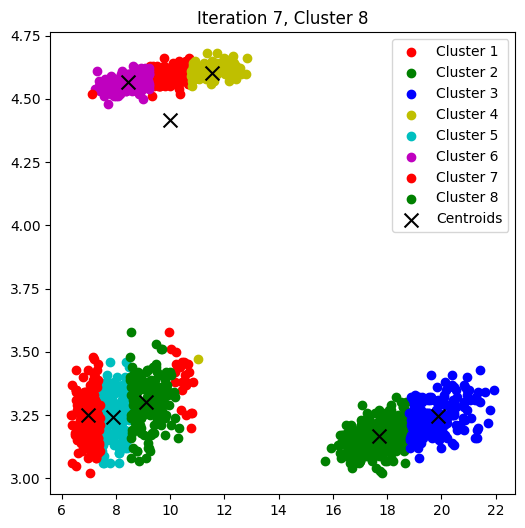

Iteration 7 WCSS: 451.70968918608986


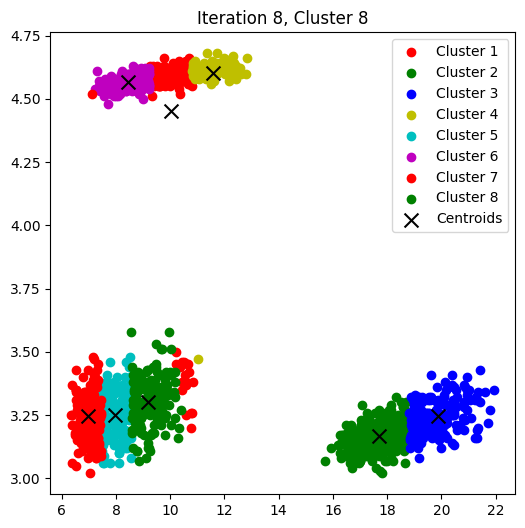

Iteration 8 WCSS: 447.56987024110776


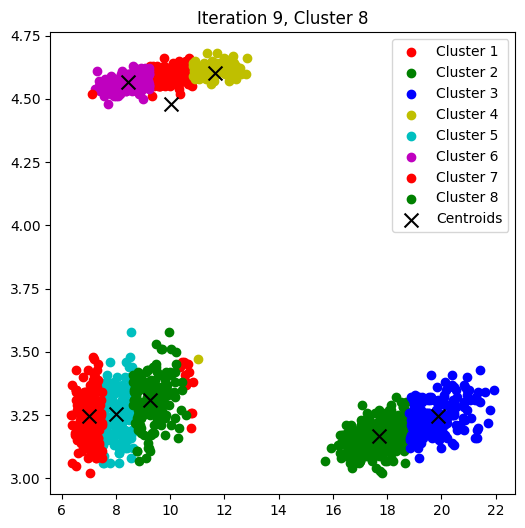

Iteration 9 WCSS: 444.5115347020363


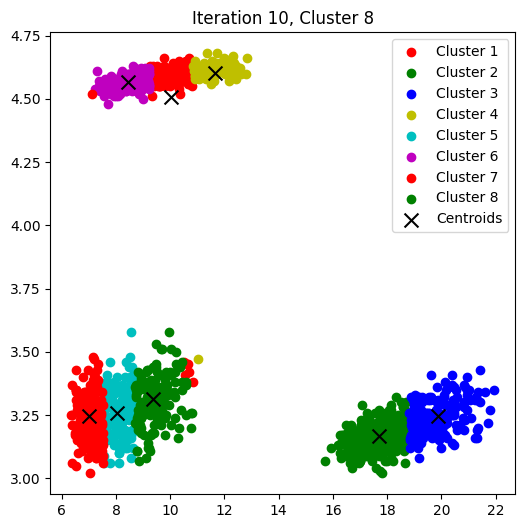

Iteration 10 WCSS: 441.101377916413


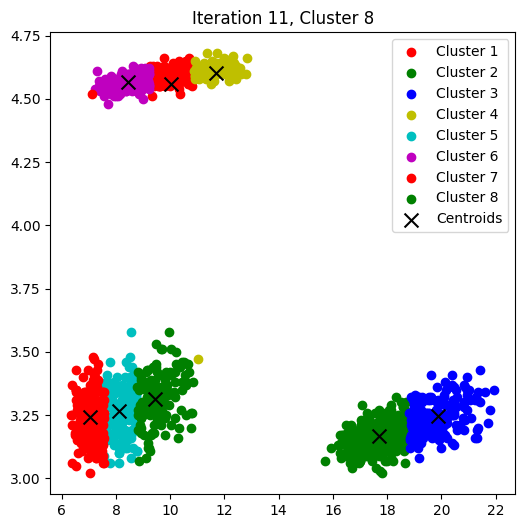

Iteration 11 WCSS: 435.7074622013832


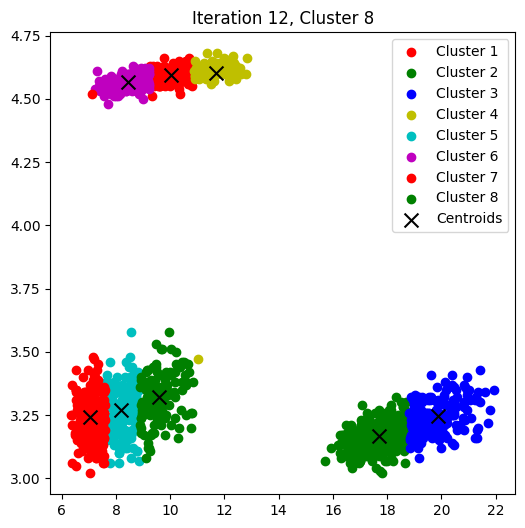

Iteration 12 WCSS: 430.1869675888719


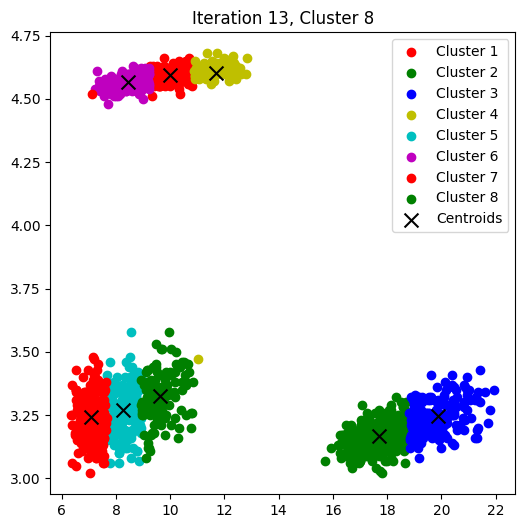

Iteration 13 WCSS: 428.4555085354295


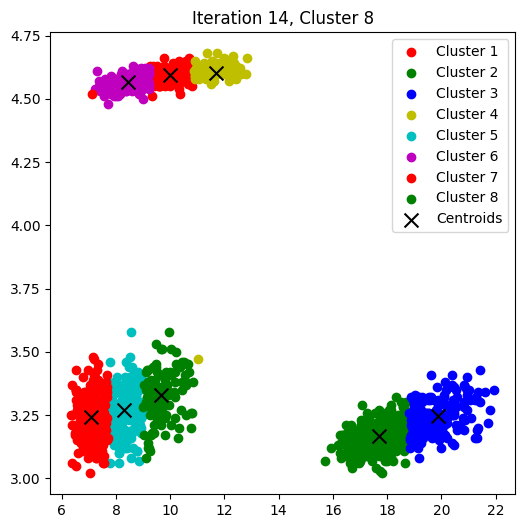

Iteration 14 WCSS: 427.2372644736535


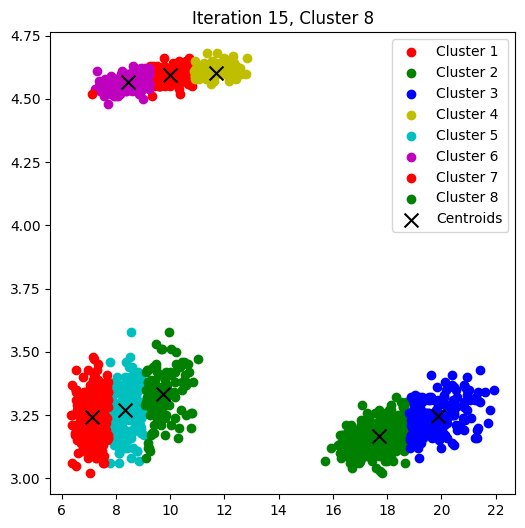

Iteration 15 WCSS: 425.64336202986584


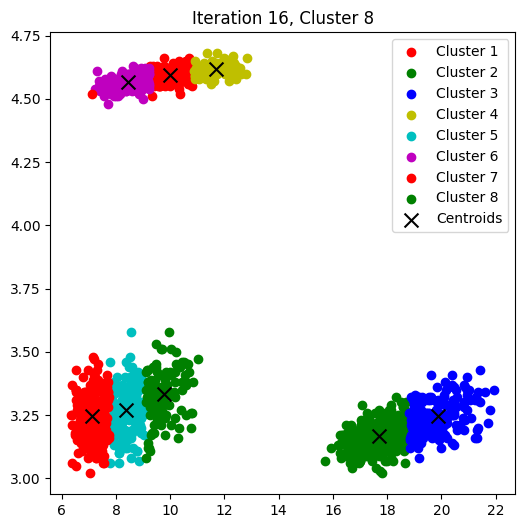

Iteration 16 WCSS: 425.032079495567


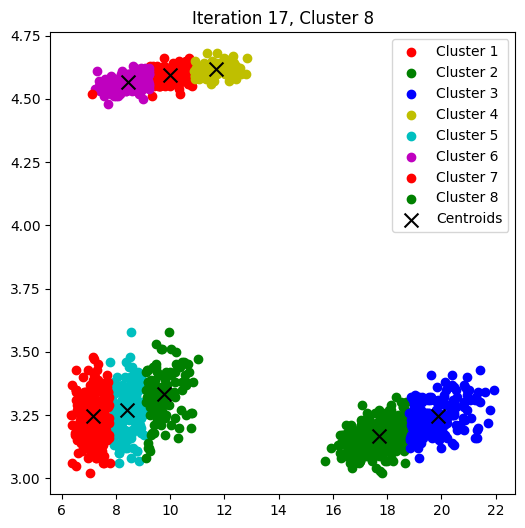

Iteration 17 WCSS: 424.9139023236683


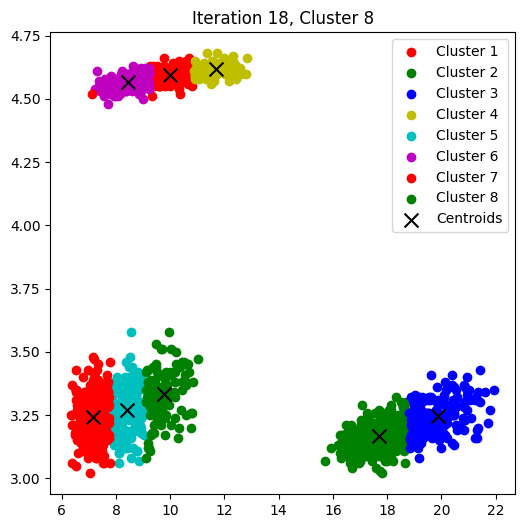

Iteration 18 WCSS: 424.82829441571295


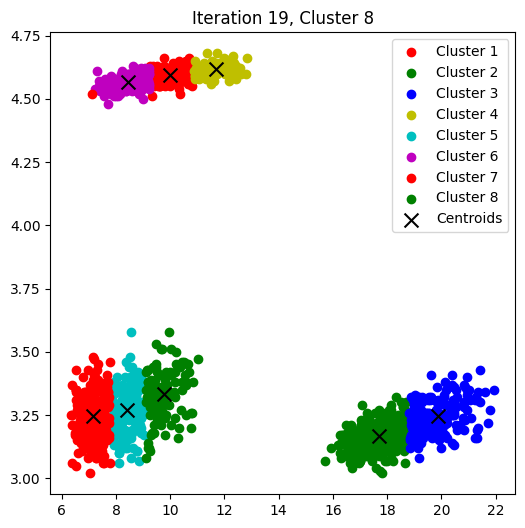

Iteration 19 WCSS: 424.82348917385303


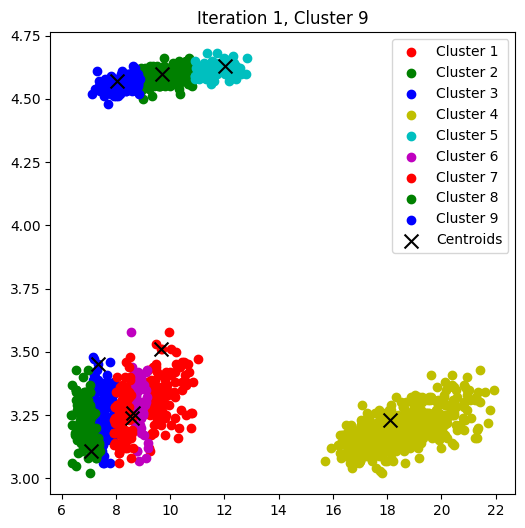

Iteration 1 WCSS: 1069.7010000000007


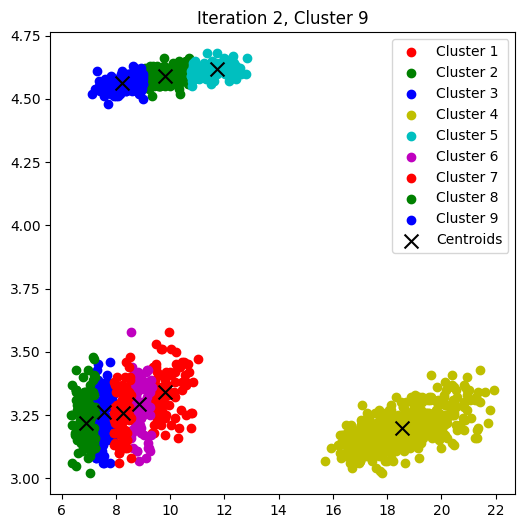

Iteration 2 WCSS: 923.1884337427394


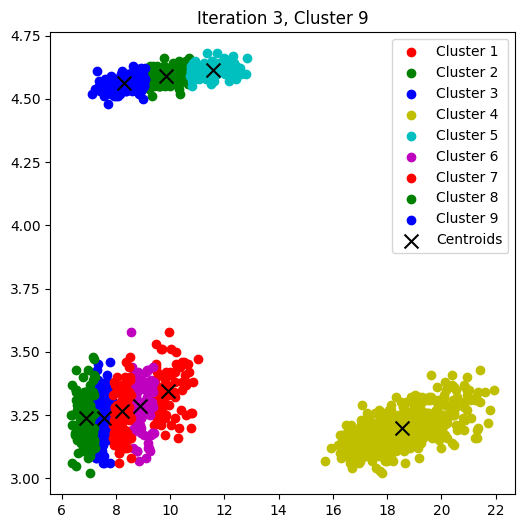

Iteration 3 WCSS: 916.6471875678831


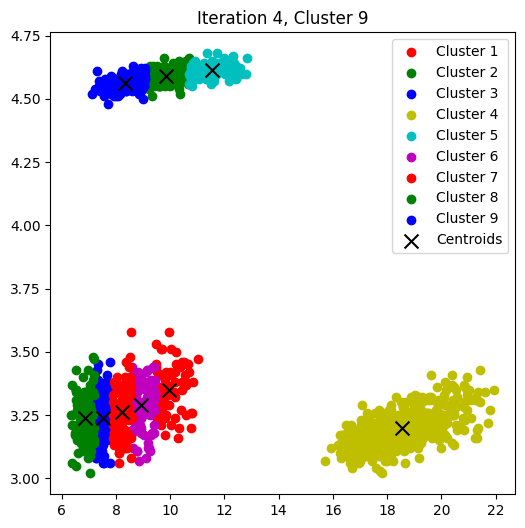

Iteration 4 WCSS: 914.8327260121733


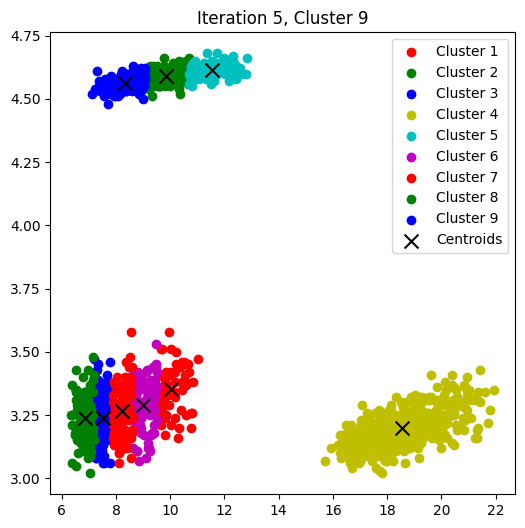

Iteration 5 WCSS: 913.5302433761552


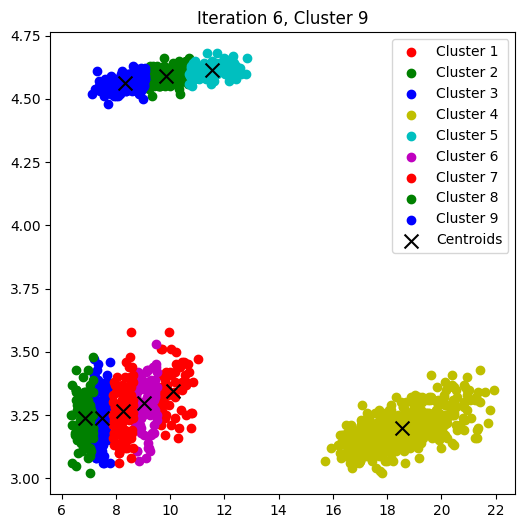

Iteration 6 WCSS: 912.8462144999627


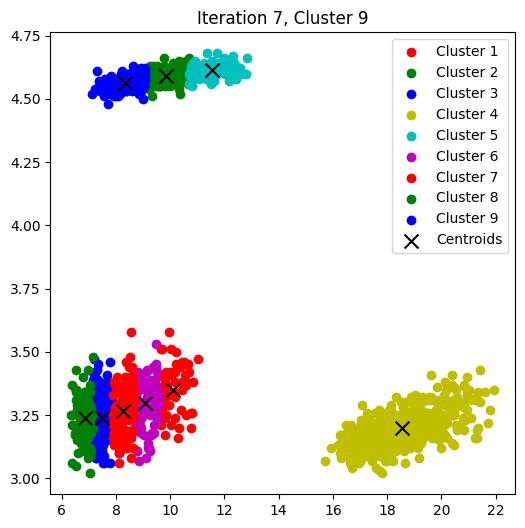

Iteration 7 WCSS: 912.5352600957365


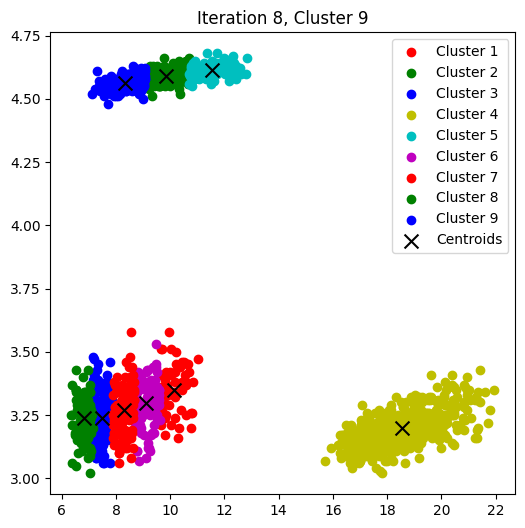

Iteration 8 WCSS: 912.1528503405888


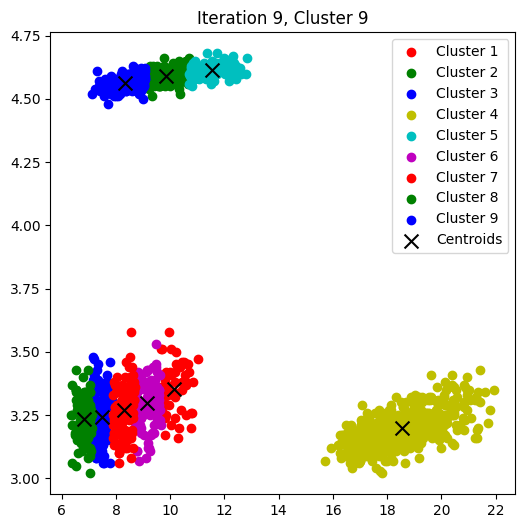

Iteration 9 WCSS: 912.004732240396


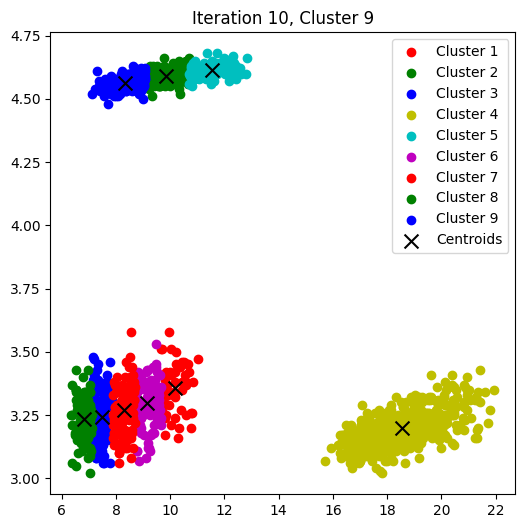

Iteration 10 WCSS: 911.8349120328957


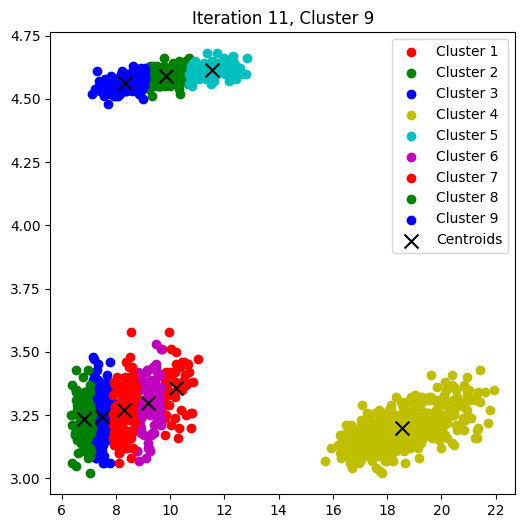

Iteration 11 WCSS: 911.7427315250369


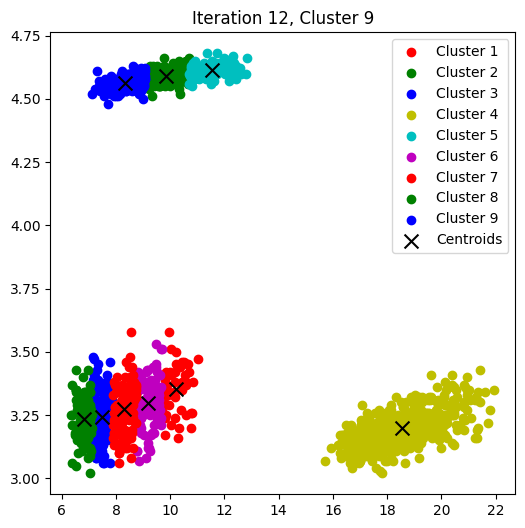

Iteration 12 WCSS: 911.6475531610217


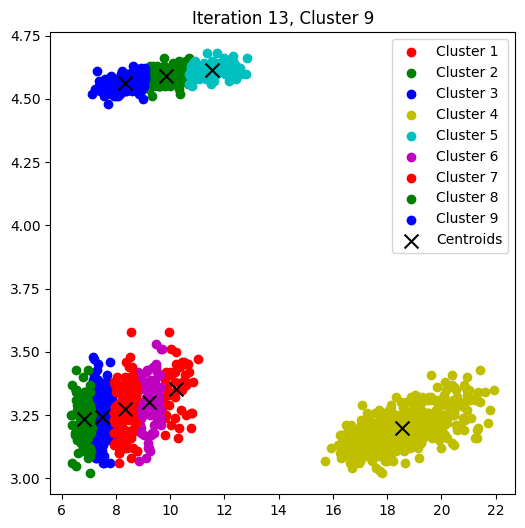

Iteration 13 WCSS: 911.5156148096115


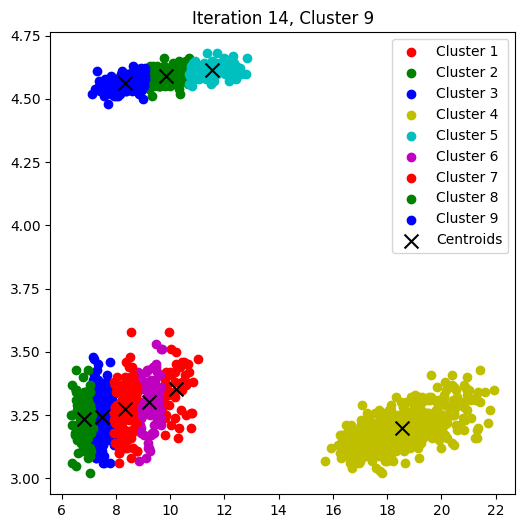

Iteration 14 WCSS: 911.4466149960027


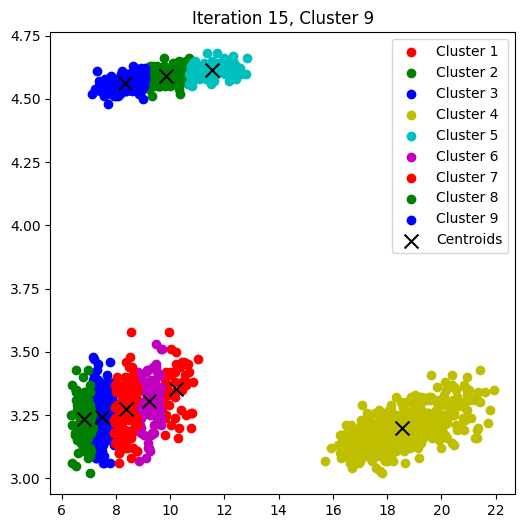

Iteration 15 WCSS: 911.3331859623776


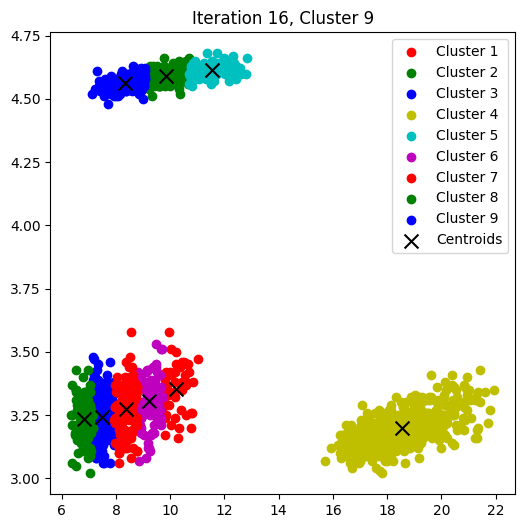

Iteration 16 WCSS: 911.2639866200717


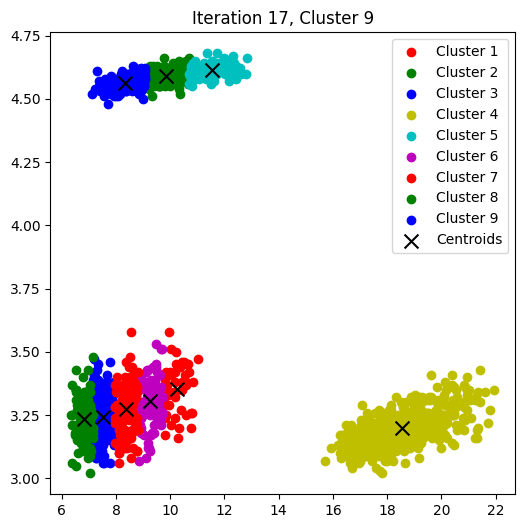

Iteration 17 WCSS: 911.1335191717283


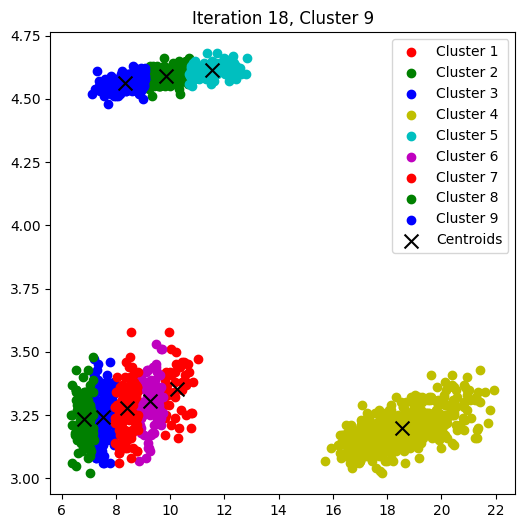

Iteration 18 WCSS: 911.0062732781097


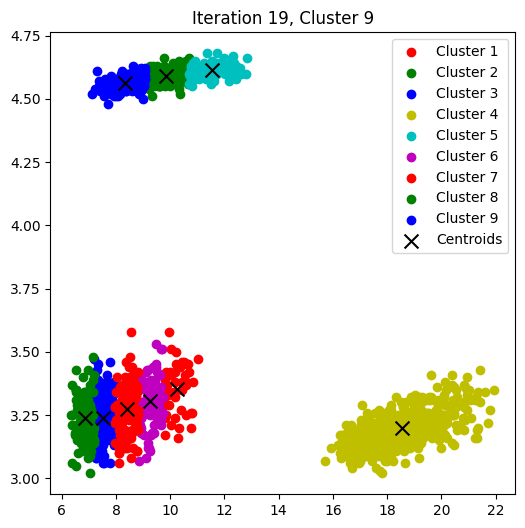

Iteration 19 WCSS: 910.9325456327886


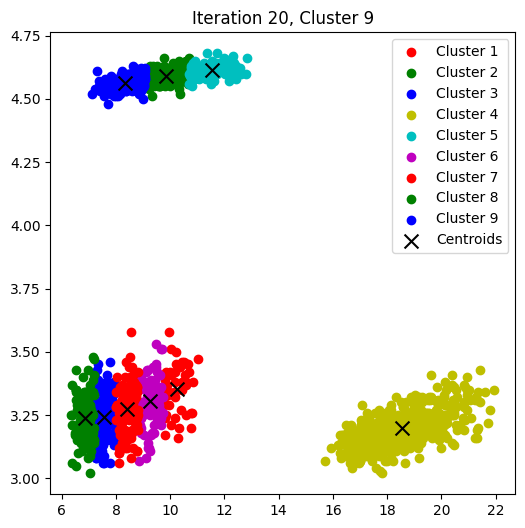

Iteration 20 WCSS: 910.8123204780048


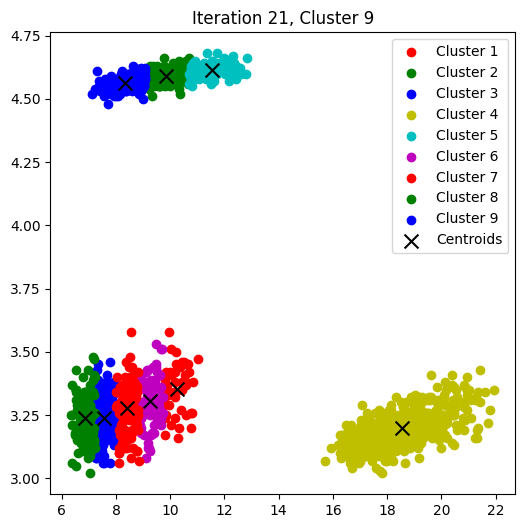

Iteration 21 WCSS: 910.6700039000061


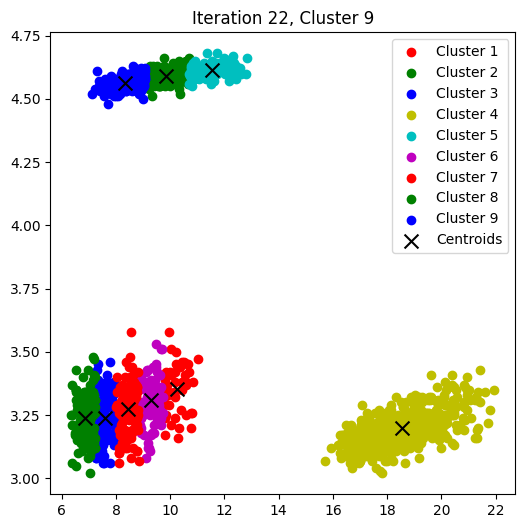

Iteration 22 WCSS: 910.5562660554597


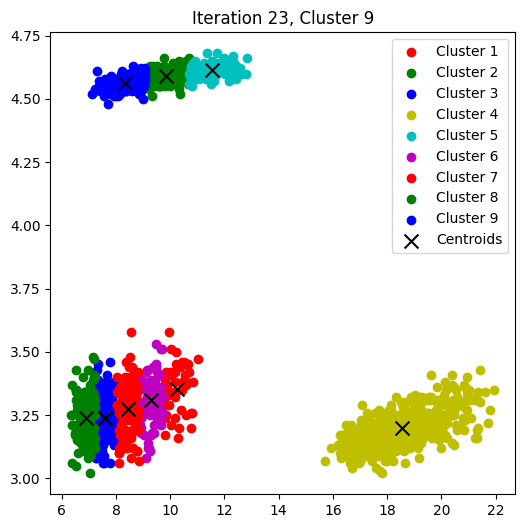

Iteration 23 WCSS: 910.4679150420721


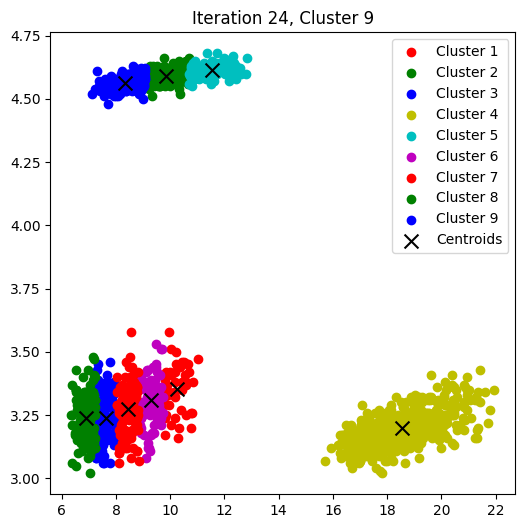

Iteration 24 WCSS: 910.4600780990335


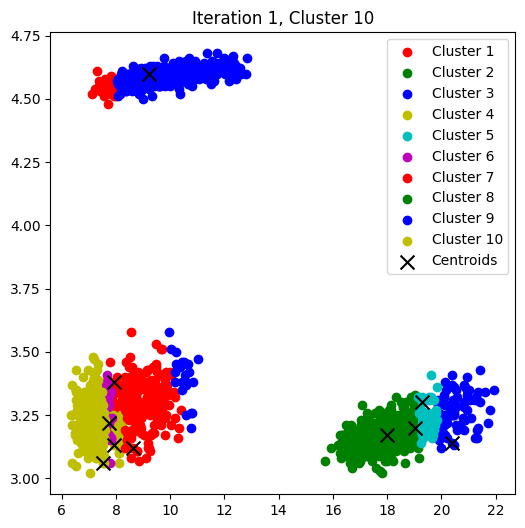

Iteration 1 WCSS: 1214.1201999999994


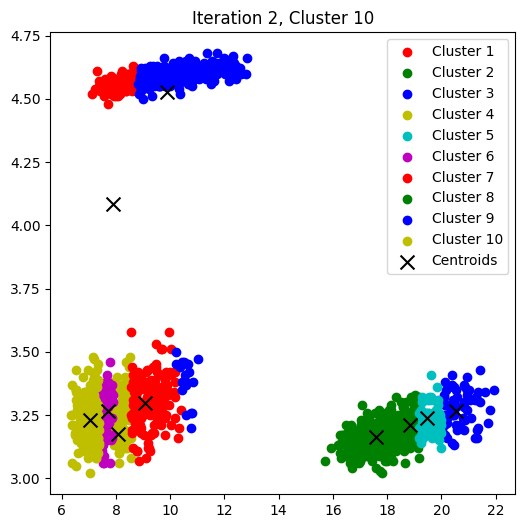

Iteration 2 WCSS: 649.4752749325575


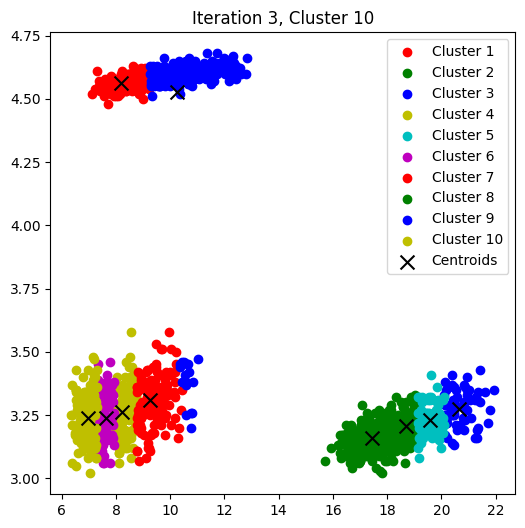

Iteration 3 WCSS: 475.77584626993786


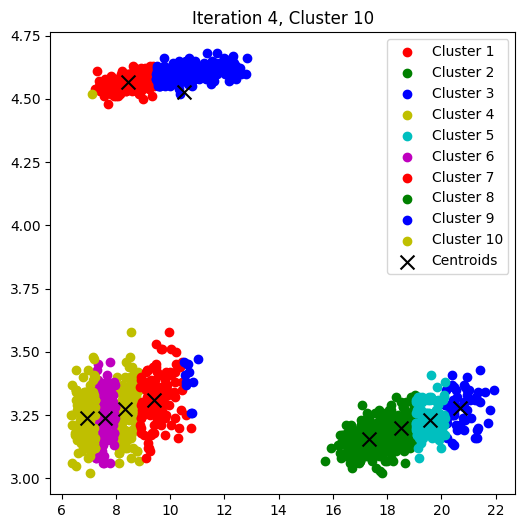

Iteration 4 WCSS: 412.413309404208


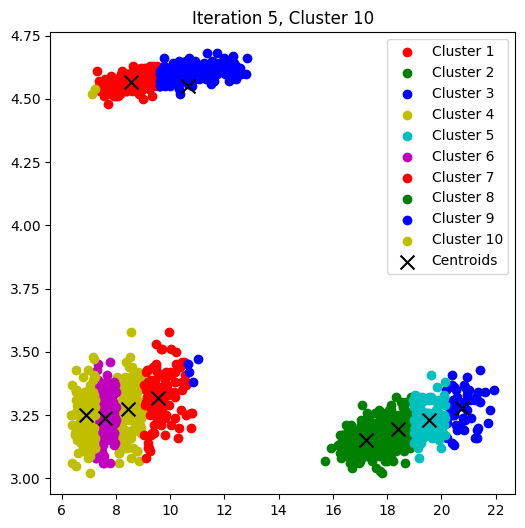

Iteration 5 WCSS: 385.02976702233076


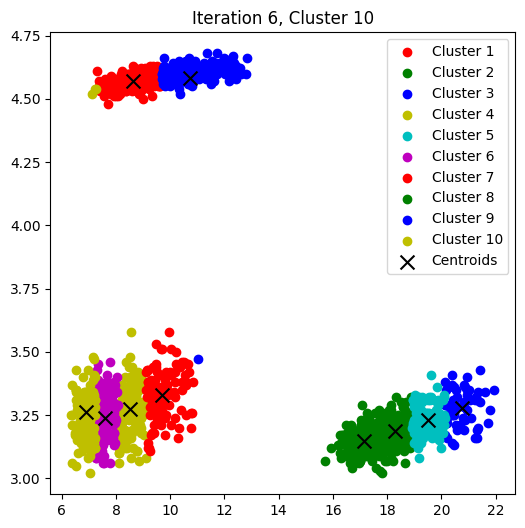

Iteration 6 WCSS: 369.68073939836046


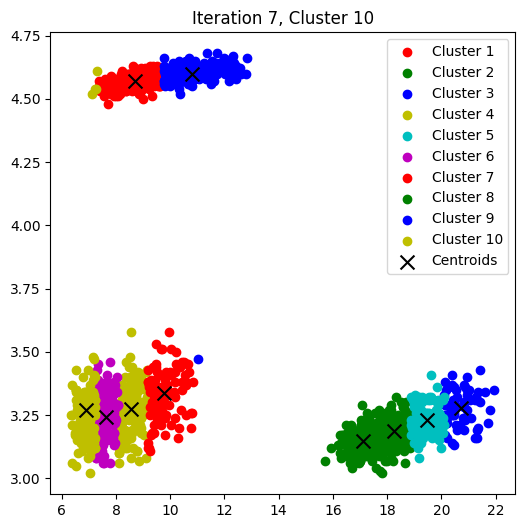

Iteration 7 WCSS: 364.17226531551825


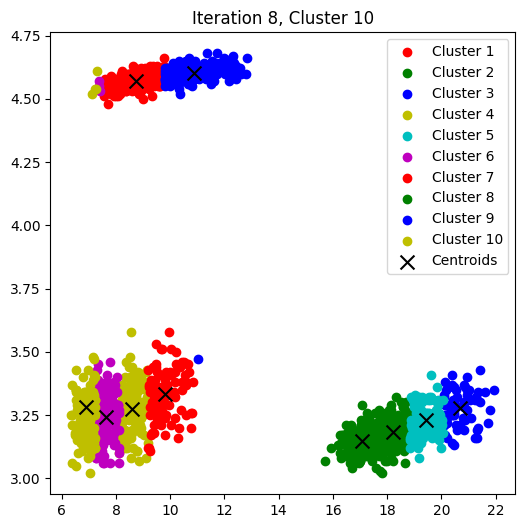

Iteration 8 WCSS: 361.36067618866133


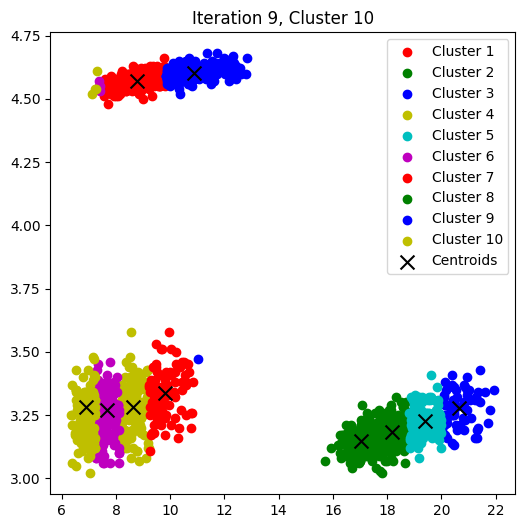

Iteration 9 WCSS: 358.9746723655839


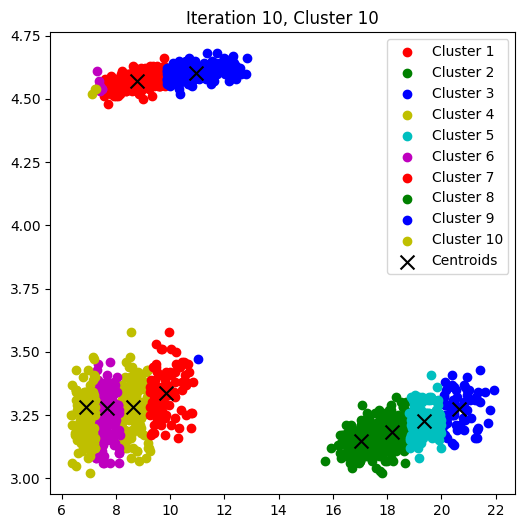

Iteration 10 WCSS: 357.68692591453504


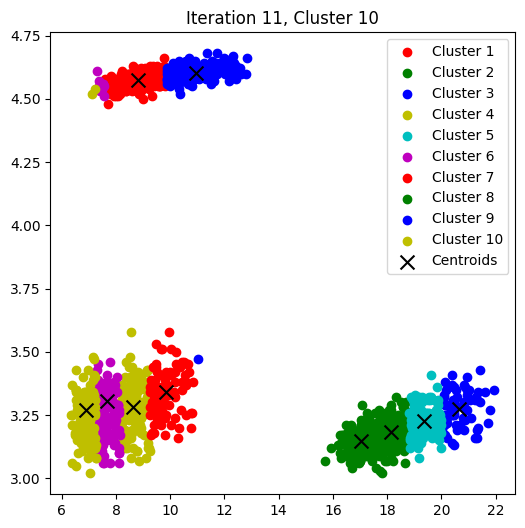

Iteration 11 WCSS: 357.01441049010407


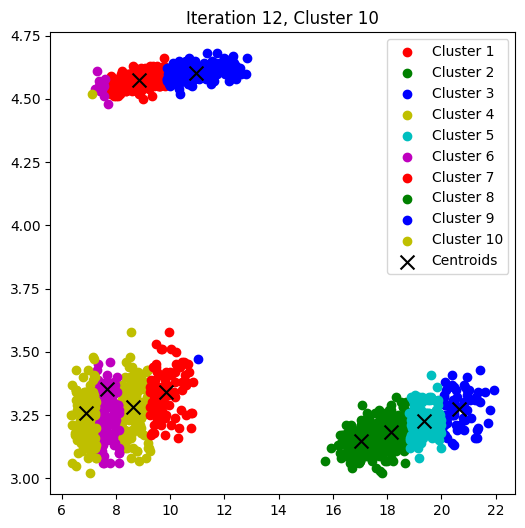

Iteration 12 WCSS: 356.249027996773


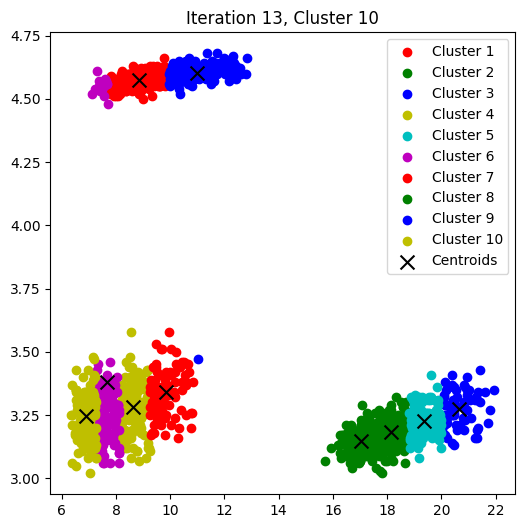

Iteration 13 WCSS: 355.49404209840384


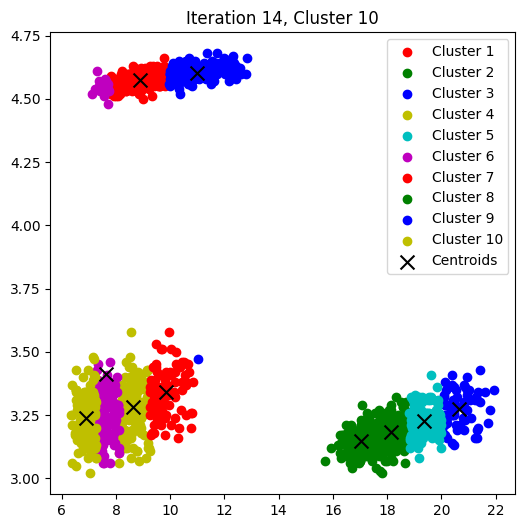

Iteration 14 WCSS: 354.61309976627285


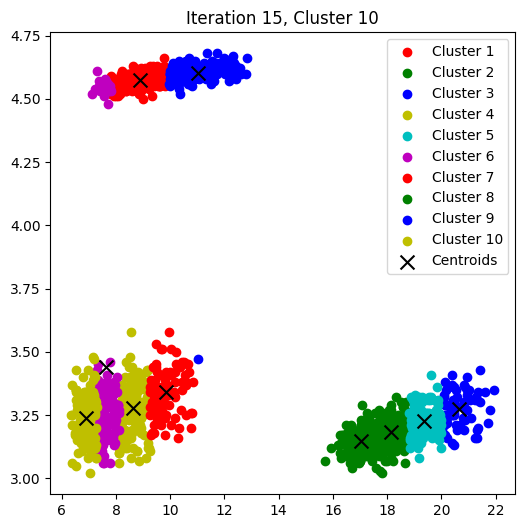

Iteration 15 WCSS: 354.2705932598779


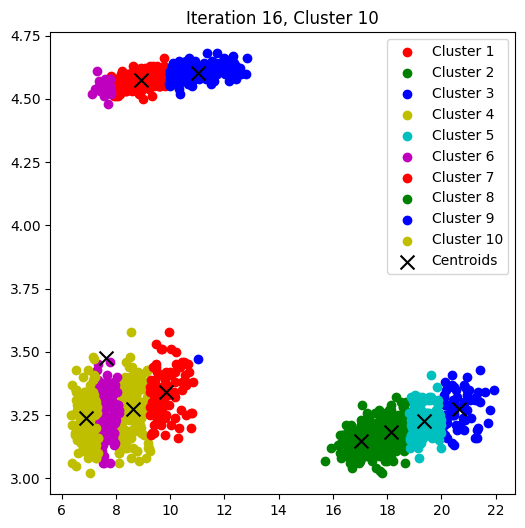

Iteration 16 WCSS: 353.7912066944507


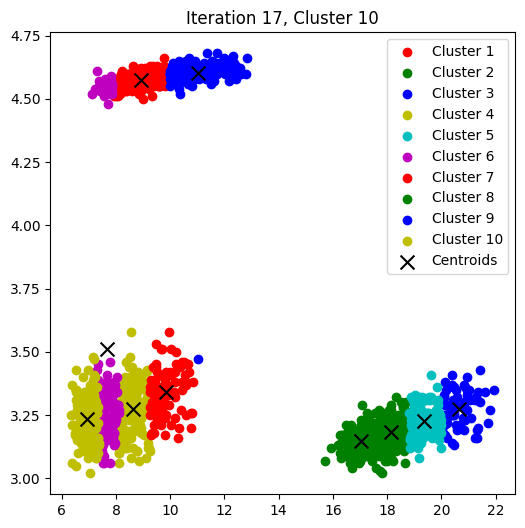

Iteration 17 WCSS: 353.0142291643112


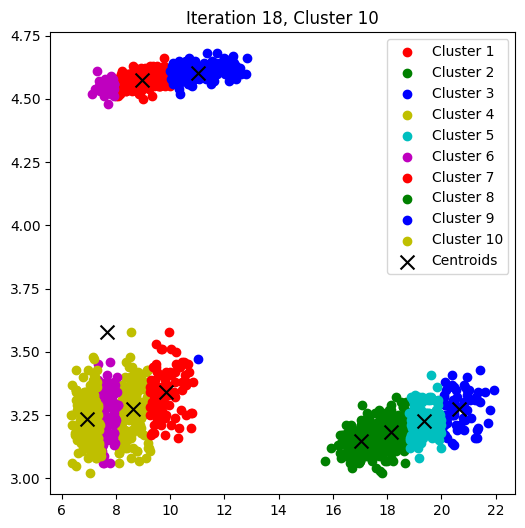

Iteration 18 WCSS: 350.34671394841456


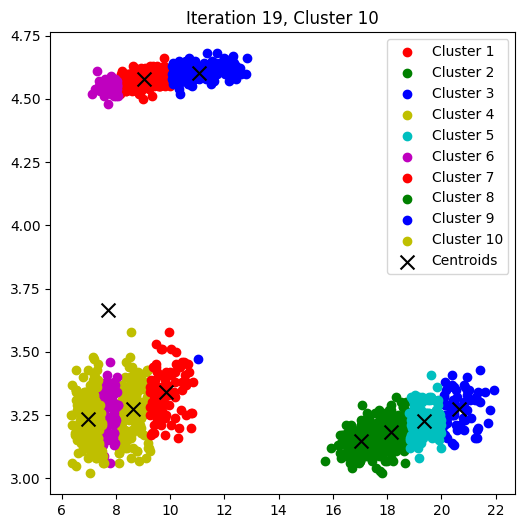

Iteration 19 WCSS: 345.58429150023807


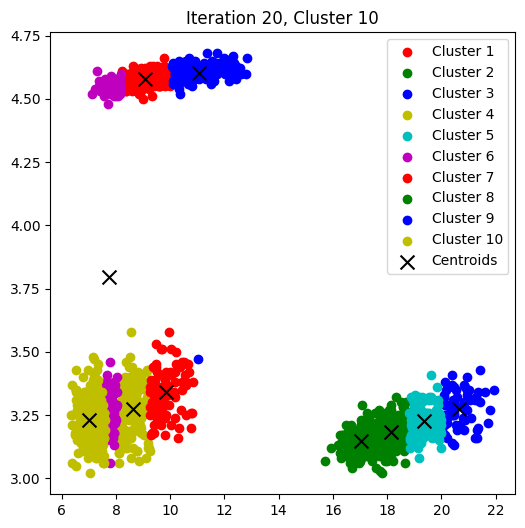

Iteration 20 WCSS: 337.15357223637045


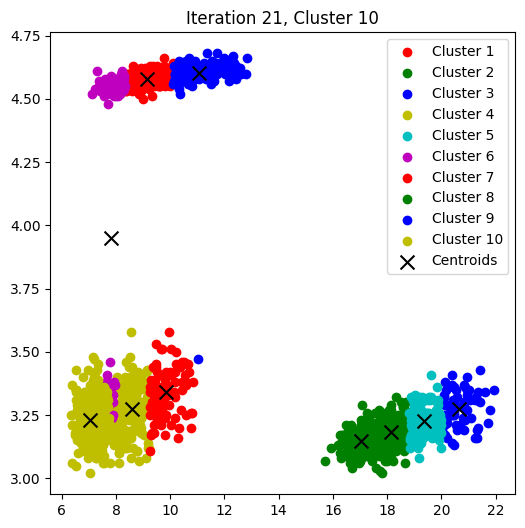

Iteration 21 WCSS: 324.5736064402892


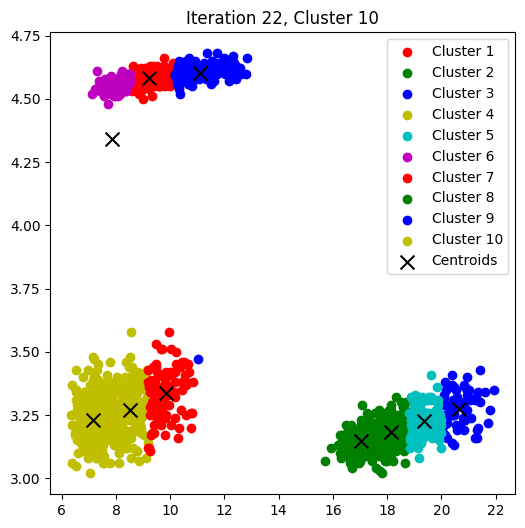

Iteration 22 WCSS: 287.22823700443047


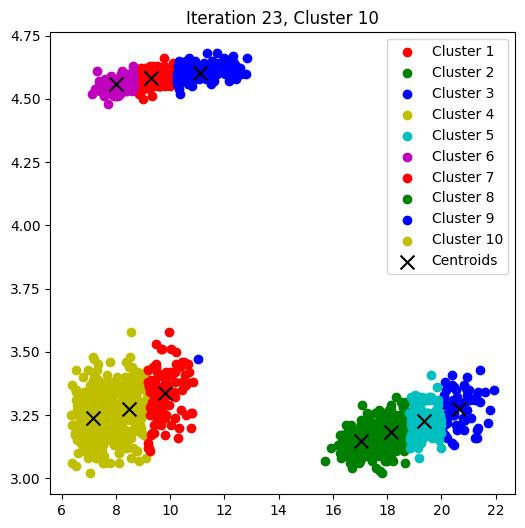

Iteration 23 WCSS: 273.0768683826297


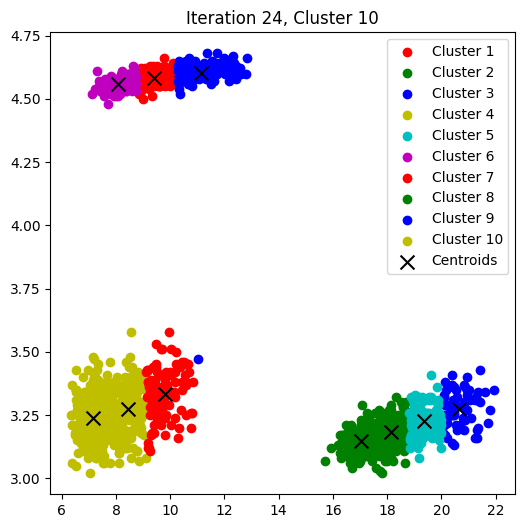

Iteration 24 WCSS: 269.544479886811


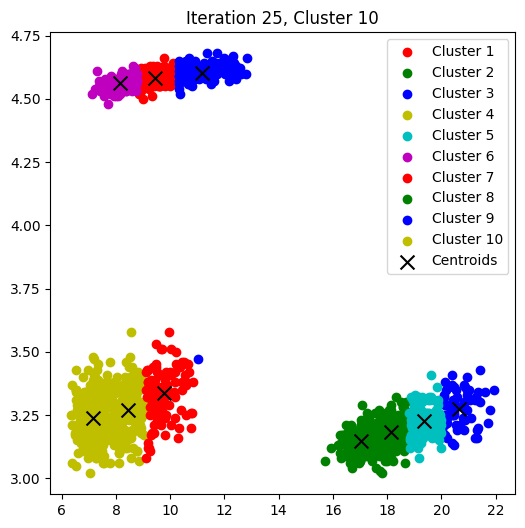

Iteration 25 WCSS: 267.98862767839694


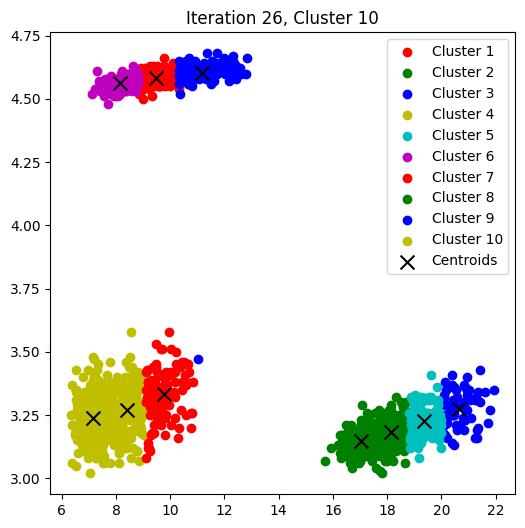

Iteration 26 WCSS: 267.2843405442956


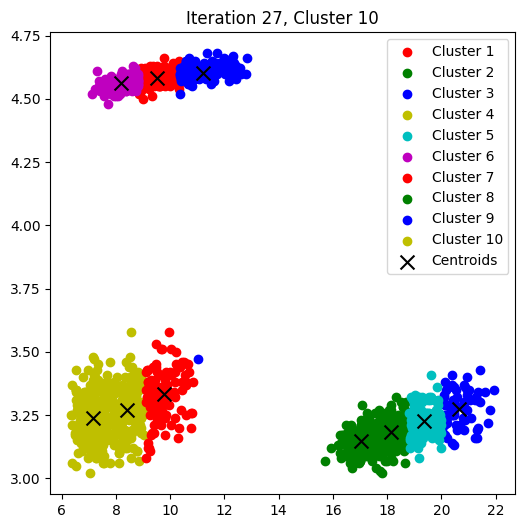

Iteration 27 WCSS: 266.29183474048494


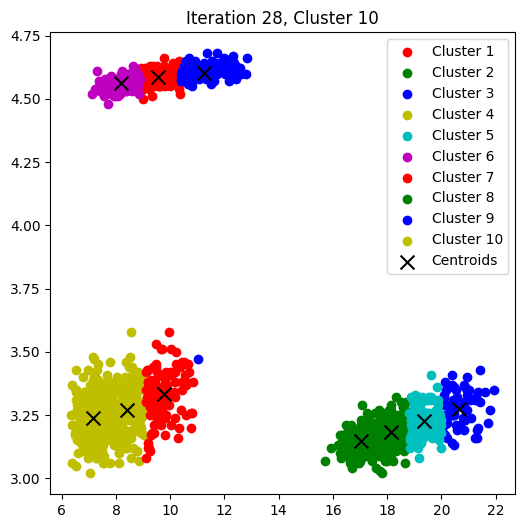

Iteration 28 WCSS: 265.4646033082505


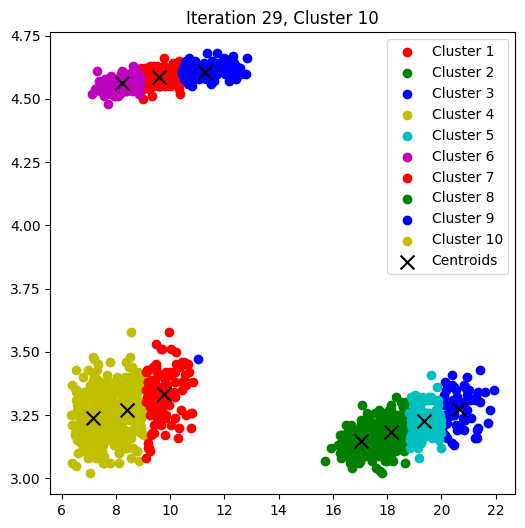

Iteration 29 WCSS: 264.55495678142563


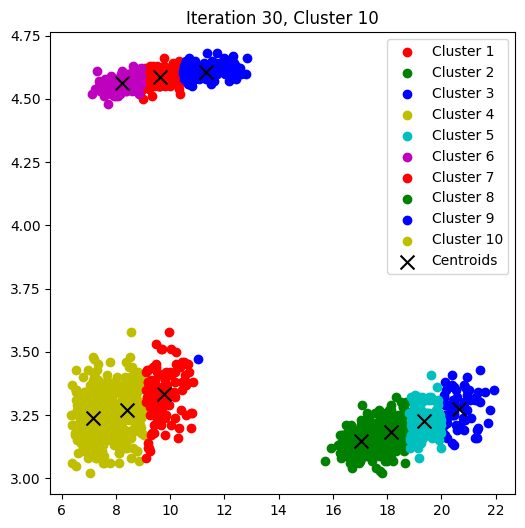

Iteration 30 WCSS: 264.1292388652272


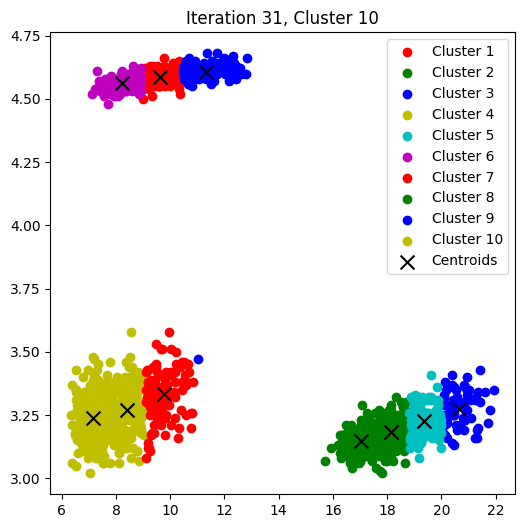

Iteration 31 WCSS: 263.93363594365434


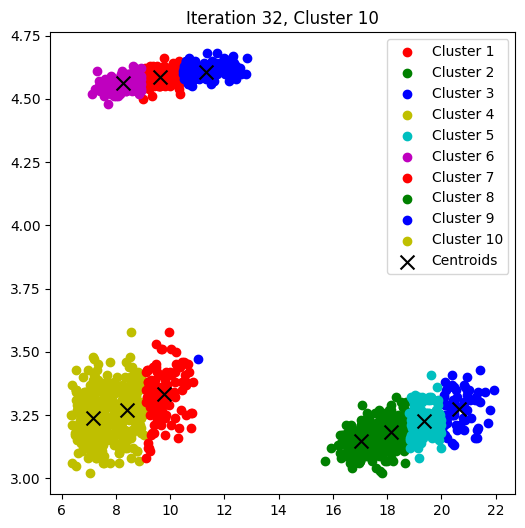

Iteration 32 WCSS: 263.92467714508194


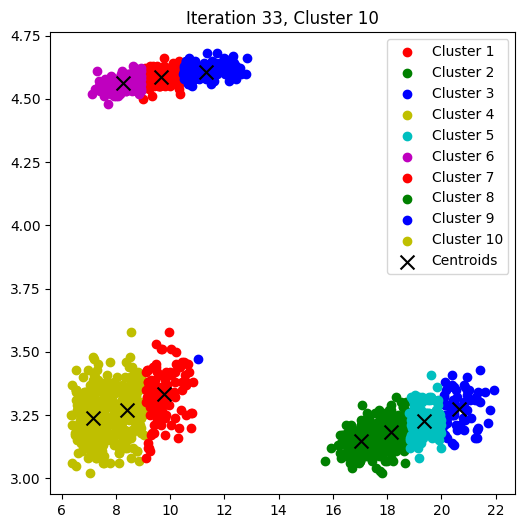

Iteration 33 WCSS: 263.8741494867525


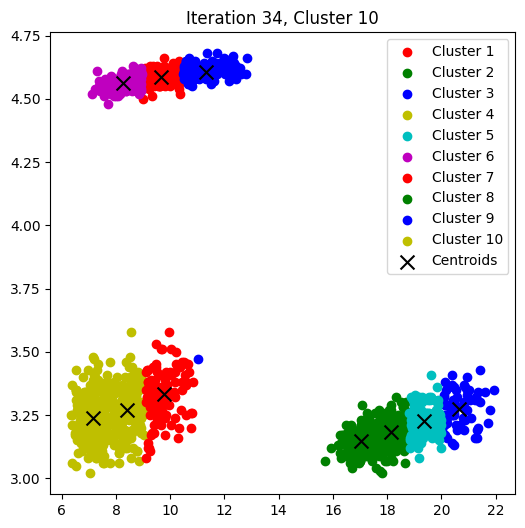

Iteration 34 WCSS: 263.8415439173257


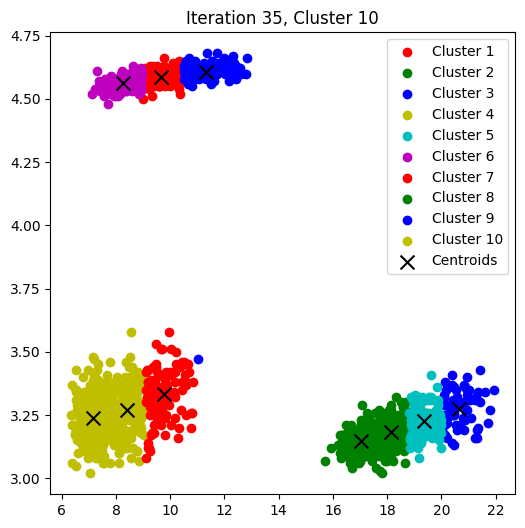

Iteration 35 WCSS: 263.8309376695346


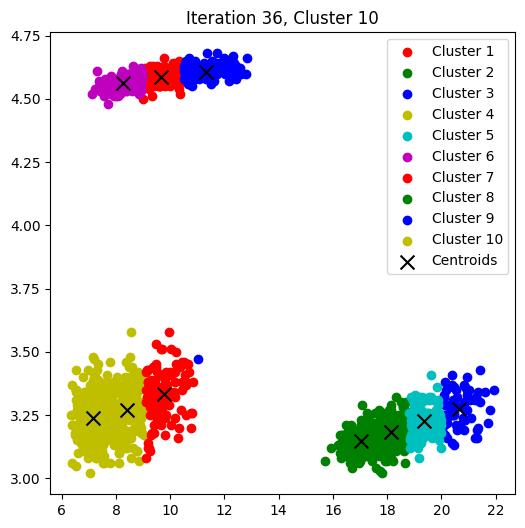

Iteration 36 WCSS: 263.8189679419031


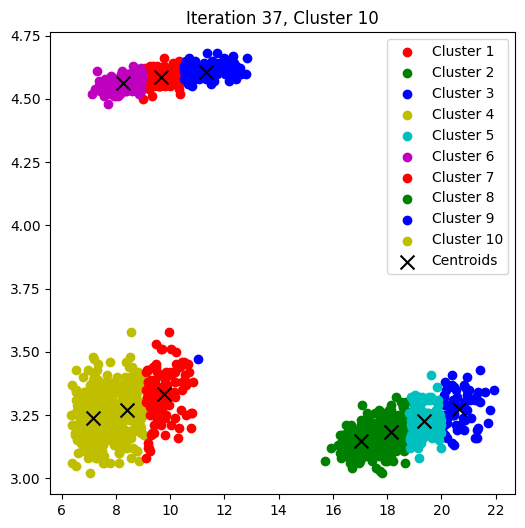

Iteration 37 WCSS: 263.79669026158854


In [ ]:
# Run k-means a bunch of times
wcss_values = {}
for i in range(1, 11):
    centroids, clusters = k_means(adjusted_df.values.tolist(), i)

In [604]:
# Function to evaluate clustering with confusion matrix
def evaluate_clustering(true_labels, predicted_labels):
    label_mapping = {}
    for cluster_id in np.unique(predicted_labels):
        mask = (predicted_labels == cluster_id)
        most_common_label = mode(true_labels[mask])[0][0]
        label_mapping[cluster_id] = most_common_label
    
    mapped_predictions = np.vectorize(label_mapping.get)(predicted_labels)
    cm = confusion_matrix(true_labels, mapped_predictions)
    print("Confusion Matrix:")
    print(cm)
    return cm

In [605]:
# Assign predicted labels from clustering
# predicted_labels = np.zeros(len(data))
# for cluster_id, cluster_points in enumerate(clusters):
#     for point in cluster_points:
#         idx = data.index(point)
#         predicted_labels[idx] = cluster_id

# # Evaluate clustering performance
# cm = evaluate_clustering(true_labels, predicted_labels)

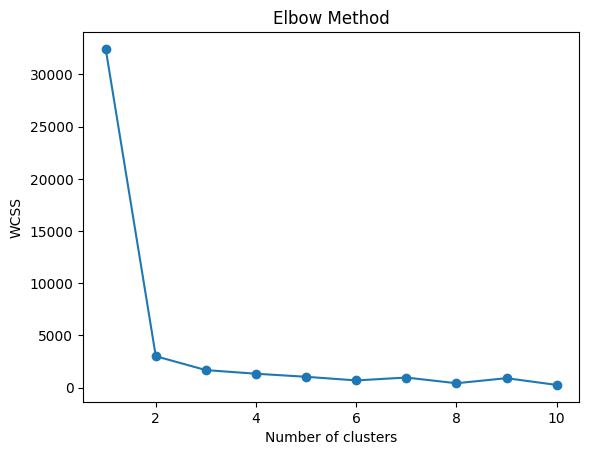

In [606]:
plt.plot(wcss_values.keys(), wcss_values.values(), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()